# 1. Preparación de Datos 

1.1 Carga de datos

1.2 Limpieza de datos

1.3 Exploración inicial: Realiza un análisis descriptivo para entender la estructura y las características del conjunto de datos.

In [3]:
import numpy as np
import pandas as pd
from unidecode import unidecode

# Importar Datos

In [5]:
# iniciamos nuestro proyecto, cargando la tabla con la que vamos a trabajar

In [6]:
data = pd.read_csv('male_players.csv')
data

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,2,https://sofifa.com/player/2/giovanni-pasquale/...,15.0,2.0,2014-09-18,G. Pasquale,Giovanni Pasquale,LM,68,68,...,69-1,69-1,69-1,71-3,72-4,70-2,70-2,70-2,72-4,13
1,11,https://sofifa.com/player/11/romain-rocchi/150002,15.0,2.0,2014-09-18,R. Rocchi,Romain Rocchi,"CM, CDM",68,68,...,65,65,65,62,60,62,62,62,60,12
2,27,https://sofifa.com/player/27/joe-cole/150002,15.0,2.0,2014-09-18,J. Cole,Joe Cole,"RM, CAM",74,74,...,59,59,59,56,50,48,48,48,50,12
3,28,https://sofifa.com/player/28/manuel-herrera-ya...,15.0,2.0,2014-09-18,Manu Herrera,Manuel Herrera Yagüe,GK,76,76,...,32,32,32,31,31,34,34,34,31,76
4,41,https://sofifa.com/player/41/andres-iniesta-lu...,15.0,2.0,2014-09-18,Iniesta,Andrés Iniesta Luján,"CM, LW",89,89,...,77+3,77+3,77+3,76+3,70+3,63+3,63+3,63+3,70+3,14+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180016,278132,/player/278132/rakan-al-kaabi/240002,24.0,2.0,2023-09-22,R. Al Kaabi,Rakan Al Kaabi,"CDM, CM",54,66,...,53+2,53+2,53+2,53+2,54+2,54+2,54+2,54+2,54+2,13+2
180017,278138,/player/278138/josh-keyes/240002,24.0,2.0,2023-09-22,J. Keyes,Josh Keyes,CM,51,65,...,48+2,48+2,48+2,49+2,48+2,44+2,44+2,44+2,48+2,14+2
180018,278139,/player/278139/rodrigo-frutos/240002,24.0,2.0,2023-09-22,R. Frutos,Rodrigo Frutos,GK,58,66,...,29+2,29+2,29+2,24+2,23+2,24+2,24+2,24+2,23+2,57+2
180019,278141,/player/278141/christian-bos/240002,24.0,2.0,2023-09-22,C. Bos,Christian Bos,RB,55,70,...,49+2,49+2,49+2,51+2,53+2,52+2,52+2,52+2,53+2,13+2


## Familiarizando con los datos

In [8]:
data.shape

(180021, 109)

In [9]:
# utilizamos un bucle para conocer el nombre de todas las columnas de nuestra tabla

for i, j in enumerate(data.columns, 1):
    print(i, j)

1 player_id
2 player_url
3 fifa_version
4 fifa_update
5 update_as_of
6 short_name
7 long_name
8 player_positions
9 overall
10 potential
11 value_eur
12 wage_eur
13 age
14 dob
15 height_cm
16 weight_kg
17 club_team_id
18 club_name
19 league_id
20 league_name
21 league_level
22 club_position
23 club_jersey_number
24 club_loaned_from
25 club_joined_date
26 club_contract_valid_until_year
27 nationality_id
28 nationality_name
29 nation_team_id
30 nation_position
31 nation_jersey_number
32 preferred_foot
33 weak_foot
34 skill_moves
35 international_reputation
36 work_rate
37 body_type
38 real_face
39 release_clause_eur
40 player_tags
41 player_traits
42 pace
43 shooting
44 passing
45 dribbling
46 defending
47 physic
48 attacking_crossing
49 attacking_finishing
50 attacking_heading_accuracy
51 attacking_short_passing
52 attacking_volleys
53 skill_dribbling
54 skill_curve
55 skill_fk_accuracy
56 skill_long_passing
57 skill_ball_control
58 movement_acceleration
59 movement_sprint_speed
60 movem

### Valores nulos por columna

In [11]:
159997+2153+1848+1865+1865+1865+1865+2250+1865+1865+169298+12588+1865+169923+169923+169923+32888+59299+166103+98216+120144


1347608

In [12]:
# usamos el siguiente bucle para identificar aquellas columnas
# en las que existen valores nulos

for i, j in enumerate(data.columns, 1):
    nulos = data[j].isnull().sum()
    print(f'{i} {j:35}: {nulos}  nulos')

1 player_id                          : 0  nulos
2 player_url                         : 0  nulos
3 fifa_version                       : 0  nulos
4 fifa_update                        : 0  nulos
5 update_as_of                       : 0  nulos
6 short_name                         : 0  nulos
7 long_name                          : 0  nulos
8 player_positions                   : 0  nulos
9 overall                            : 0  nulos
10 potential                          : 0  nulos
11 value_eur                          : 2153  nulos
12 wage_eur                           : 1848  nulos
13 age                                : 0  nulos
14 dob                                : 0  nulos
15 height_cm                          : 0  nulos
16 weight_kg                          : 0  nulos
17 club_team_id                       : 1865  nulos
18 club_name                          : 1865  nulos
19 league_id                          : 1865  nulos
20 league_name                        : 1865  nulos
21 league_l

### Tipos de datos por columna

In [14]:
# es necesario conocer el tipo de dato que manejaremos en este proyecto,
# por lo que pasamos a desglosarlo por columna

for i, j in enumerate(data.columns, 1):
    tipo = data[j].dtypes
    print(f'{i} {j:35}: {tipo}')

1 player_id                          : int64
2 player_url                         : object
3 fifa_version                       : float64
4 fifa_update                        : float64
5 update_as_of                       : object
6 short_name                         : object
7 long_name                          : object
8 player_positions                   : object
9 overall                            : int64
10 potential                          : int64
11 value_eur                          : float64
12 wage_eur                           : float64
13 age                                : int64
14 dob                                : object
15 height_cm                          : int64
16 weight_kg                          : int64
17 club_team_id                       : float64
18 club_name                          : object
19 league_id                          : float64
20 league_name                        : object
21 league_level                       : float64
22 club_position     

### Consulta filas duplicadas

In [16]:
print("Filas duplicadas:", data.duplicated().sum())  
data.drop_duplicates(inplace=True)

Filas duplicadas: 0


# Trabajo con columnas

## Eliminacion de columnas irrelevantes

In [19]:
# tras el analisis anterior, tomamos la decision de prescindir de las siguientes columnas,
# ya que no intervienen de manera significativa en nuetro objetivo

col_a_eliminar = ["fifa_update", "update_as_of", "short_name", "long_name", "league_level", "club_jersey_number", 
                  "club_loaned_from", "club_joined_date", "club_contract_valid_until_year", "nation_team_id", "nation_position", 
                  "nation_jersey_number", "weak_foot", "skill_moves", "international_reputation", "work_rate", "body_type", "real_face", 
                  "release_clause_eur", "player_tags", "player_traits", "mentality_composure", 'potential', 'weight_kg']

In [20]:
data = data.drop(col_a_eliminar, axis = 1)
data.shape

(180021, 85)

## Cambio de nomenclatura

In [22]:
# decidimos traducir y hacer mas legible nuestra tabla con estos cambios

nuevos_nombres_columnas = {
    'fifa_version': 'version','player_positions': 'posiciones','dob': 'nacimiento','overall': 'est_general','value_eur': 'valor_de_mercado','wage_eur': 'salario_semanal','age': 'edad',
    'height_cm': 'altura','club_name': 'nombre_club','league_id': 'id_liga','league_name': 'nombre_liga','club_position': 'posicion_club','nationality_id': 'id_nacionalidad','nationality_name': 'nacionalidad',
    'preferred_foot': 'pierna','pace': 'ritmo','shooting': 'chut','passing': 'pase','dribbling': 'regate','defending': 'defensa',
    'physic': 'fisico','attacking_crossing': 'centros_ataque','attacking_finishing': 'finalizacion','attacking_heading_accuracy': 'remate_cabeza',
    'attacking_short_passing': 'pase_corto_ataque','attacking_volleys': 'volea','skill_dribbling': 'habilidad_regate','skill_curve': 'efecto',
    'skill_fk_accuracy': 'eficacia_faltas','skill_long_passing': 'habilidad_pase_largo','skill_ball_control': 'habilidad_control','movement_acceleration': 'aceleracion',
    'movement_sprint_speed': 'velocidad_max','movement_agility': 'agilidad', 'movement_reactions': 'reaccion', 'movement_balance': 'equilibrio',
    'power_shot_power': 'potencia_tiro', 'power_jumping': 'potencia_salto', 'power_stamina': 'aguante', 'power_strength': 'fortaleza', 'power_long_shots': 'fuerza_chuts_lejanos',
    'mentality_aggression': 'agresividad','mentality_interceptions': 'anticipacion','mentality_positioning': 'posicionamiento',
    'mentality_vision': 'vision_juego','mentality_penalties': 'penalties','defending_marking_awareness': 'marcaje','defending_standing_tackle': 'abordaje',
    'defending_sliding_tackle': 'entrada','goalkeeping_diving': 'estirada','goalkeeping_handling': 'manejo','goalkeeping_kicking': 'pateo','goalkeeping_positioning': 'posicion_por',
    'goalkeeping_reflexes': 'reflejos','goalkeeping_speed': 'velocidad_por',
    'ls': 'del_izq','st': 'del','rs': 'del_dch','lw': 'extr_izq','lf': 'seg_del_izq','cf': 'media_punta','rf': 'seg_del_dch','rw': 'extr_dch',
    'lam': 'med_cen_def_izq','cam': 'med_cen_of','ram': 'med_cen_of_izq','lm': 'med_izq','lcm': 'med_cen_izq','cm': 'med_cen','rcm': 'med_cen_dch',
    'rm': 'med_dch','lwb': 'carr_izq','ldm': 'med_def_izq','cdm': 'med_cen_def','rdm': 'med_cen_def_dch','rwb': 'carr_dch','lb': 'lat_izq',
    'lcb': 'def_cen_izq', 'cb': 'def_cen', 'rcb': 'def_cen_dch','rb': 'lat_dch','gk': 'portero', 'club_team_id': 'id_equipo', 'player_id': 'id_jugador'
    
}
data.rename(columns = nuevos_nombres_columnas, inplace=True)

## Completando valores nulos

In [24]:
# la busqueda de valores nulos, nos lleva a un analisis mas intensivo
# sobre las razones de la existencia de los mismos.
# en concreto, el conjunto: 'id_liga', 'valor_de_mercado', 'salario_semanal',
# 'nombre_liga', 'posicion_club' y 'nombre_club', estan directamente relacionadas.
# pudimos averiguar que estos valores nulos coincidian con el hecho que los jugadores
# que se veian afectados, eran jugadores sin equipo o jugadores en ultimo año de contrato
# y que era conocida su retirada al final de temporada; por lo que procedimos a 
# valorar y agrupar a esos jugadores en consecuencia.

### id_liga, valor_de_mercado, 'salario_semanal', 'nombre_liga', 'posicion_club', 'nombre_club'

In [26]:
valores_de_nulos = {
    'id_liga': 0,
    'valor_de_mercado': 0,
    'salario_semanal': 0,
    'id_equipo': 0,
    'nombre_liga': "Otros",
    'posicion_club': "Otros",
    'nombre_club': "Otros"
}
for i, j in valores_de_nulos.items():
    data[i] = data[i].fillna(j)

In [27]:
# encontramos dificultades a la hora de calificar consecuentemente a los jugadores
# con atributos de juego vacios. Tomamos la decision de evaluarles, tomando como referencia
# algunos de sus otros atributos y que fueran relevantes para obtener una media,
# que en nuestra opinion, fueran justos y poco desequilibrantes en futuros pasos.

### 'ritmo', 'chut', 'pase', 'regate', 'defensa', 'fisico', 'velocidad_por'

In [29]:
promedio = {
    "ritmo": ['finalizacion', 'habilidad_regate', 'equilibrio', 'fortaleza', 'posicionamiento', 'marcaje'],
    "chut": ['finalizacion', 'eficacia_faltas', 'potencia_tiro', 'equilibrio', 'penalties', 'pateo'],
    "pase": ['pase_corto_ataque', 'habilidad_pase_largo', 'equilibrio', 'vision_juego', 'manejo'],
    "regate": ['centros_ataque', 'habilidad_regate', 'reaccion', 'equilibrio', 'aguante', 'agresividad', 'estirada'],
    "defensa": ['habilidad_control', 'potencia_salto', 'reaccion', 'equilibrio', 'anticipacion', 'marcaje'],
    "fisico": ['habilidad_control', 'potencia_salto', 'reaccion', 'equilibrio', 'anticipacion', 'marcaje'],
    "velocidad_por": ['estirada', 'manejo', 'pateo', 'posicion_por', 'reflejos']
}
for i, promedio in promedio.items():
    data[i] = data[i].fillna(data[promedio].mean(axis=1)).astype(int)

## Cambiando el tipo de dato

In [31]:
# para trabajar de manera mas 'prolija', modificamos el tipo de dato por columna

### version

In [33]:
data['version'] = data['version'] + 2000
data['version'] = pd.to_datetime(data['version'], format='%Y')
data['version'] = data['version'].dt.year

### nacimiento

In [35]:
data['nacimiento'] = pd.to_datetime(data['nacimiento'], errors='coerce')
data['nacimiento'] = data['nacimiento'].dt.strftime('%d %m %Y')

# Modificacion de valores

In [37]:
# una vez finalizado nuestro trabajo con la estructura de la tabla, procedemos a darle 
# forma, cambiando los valores de diferentes columnas.
# en concreto; tuvimos que valorar las columnas relativas a los nombres; las cuales,
# no eran de gran ayuda para lo que queriamos hacer. Finalmente tomamos el camino
# de utilizar la columna 'player-url', en la que teniamos el nombre sin caracteres
# especiales, separado por un guion y en minusculas. Tras utilizar un bucle, se pudieron
# conseguir, dichos nombres, como deseabamos.

## Transformando la columna 'player_url'

In [39]:
nombres = []

for i in data['player_url']:
    parte = i.split('/')
    
    if i.startswith('http'):
        seg = parte[5] if len(parte) > 5 else None
    else:
        seg = parte[3] if len(parte) > 3 else None
        
    nombres.append(seg)
    
data['player_url'] = nombres

data['player_url'] = data['player_url'].str.replace('-', ' ').str.title()

data = data.rename(columns = {'player_url': 'nombre_jugador'})

## Traduccion en columna 'posiciones'

In [41]:
nuevas_posiciones = {
    'GK': 'POR','RWB': 'CAD','RB': 'LAD','CB': 'CEN','RCB': 'CDE','LCB': 'CIZ','LB': 'LIZ','LWB': 'CAI','RM': 'MED',
    'CM': 'MEC','LM': 'MEI','CDM': 'MCD','CAM': 'MCO','RF': 'SDD','CF': 'MPN','LF': 'SDI','RW': 'EXD','ST': 'DC',
    'LW': 'EXI','LS': 'DEI','RS': 'DED','LAM': 'MOI','RAM': 'MOD','LCM': 'MCI','RCM': 'MCD','LDM': 'MDI','RDM': 'MDD'}

def posiciones(nuevas_denom):
    posiciones = nuevas_denom.split(', ')
    return ', '.join([nuevas_posiciones.get(i, i) for i in posiciones])

data['posiciones'] = data['posiciones'].apply(lambda x: posiciones(x) if pd.notnull(x) else x)

## Eliminando caracteres especiales de 'nombre_club'

In [43]:
data['nombre_club'] = data['nombre_club'].astype(str).apply(unidecode)

## Traduciendo nombres de paises 'nacionalidad'

In [45]:
data['nacionalidad'].unique()
nacionalidad = {'Italy': 'Italia', 'France': 'Francia', 'England': 'Inglaterra', 'Spain': 'España', 'Montenegro': 'Montenegro',
"Côte d'Ivoire": 'Costa de Marfil', 'Turkey': 'Turquía', 'Republic of Ireland': 'República de Irlanda', 'Wales': 'Gales',
'Australia': 'Australia', 'Brazil': 'Brasil', 'Hungary': 'Hungría', 'Germany': 'Alemania', 'Austria': 'Austria',
'Argentina': 'Argentina', 'Switzerland': 'Suiza', 'Netherlands': 'Países Bajos', 'Sweden': 'Suecia', 'Portugal': 'Portugal',
'Scotland': 'Escocia', 'Mexico': 'México', 'Senegal': 'Senegal', 'Norway': 'Noruega', 'Northern Ireland': 'Irlanda del Norte',
'Mali': 'Mali', 'Belgium': 'Bélgica', 'United States': 'Estados Unidos', 'Finland': 'Finlandia', 'Jamaica': 'Jamaica',
'Czech Republic': 'República Checa', 'Cameroon': 'Camerún', 'Denmark': 'Dinamarca', 'Barbados': 'Barbados', 'Congo DR': 'República Democrática del Congo',
'Colombia': 'Colombia', 'Liechtenstein': 'Liechtenstein', 'Trinidad and Tobago': 'Trinidad y Tobago', 'Poland': 'Polonia',
'Libya': 'Libia', 'Chile': 'Chile', 'Peru': 'Perú', 'Paraguay': 'Paraguay', 'Bulgaria': 'Bulgaria', 'Philippines': 'Filipinas',
'Korea Republic': 'Corea del Sur', 'Iceland': 'Islandia', 'Canada': 'Canadá', 'Belarus': 'Bielorrusia', 'Croatia': 'Croacia',
'Ghana': 'Ghana', 'Congo': 'Congo', 'Uruguay': 'Uruguay', 'Lithuania': 'Lituania', 'Algeria': 'Argelia', 'Nigeria': 'Nigeria',
'Haiti': 'Haití', 'South Africa': 'Sudáfrica', 'Venezuela': 'Venezuela', 'Tunisia': 'Túnez', 'Morocco': 'Marruecos', 'Togo': 'Togo',
'Greece': 'Grecia', 'Slovenia': 'Eslovenia', 'Serbia': 'Serbia', 'Russia': 'Rusia', 'North Macedonia': 'Macedonia del Norte',
'Ukraine': 'Ucrania', 'Syria': 'Siria', 'Albania': 'Albania', 'Romania': 'Rumania', 'Grenada': 'Granada', 'Comoros': 'Comoras',
'Liberia': 'Liberia', 'Panama': 'Panamá', 'Egypt': 'Egipto', 'Estonia': 'Estonia', 'Israel': 'Israel',
'Bosnia and Herzegovina': 'Bosnia y Herzegovina', 'Slovakia': 'Eslovaquia', 'Angola': 'Angola', 'Kosovo': 'Kosovo',
'Saint Kitts and Nevis': 'San Cristóbal y Nieves', 'Armenia': 'Armenia', 'Oman': 'Omán', 'Uzbekistan': 'Uzbekistán',
'Bolivia': 'Bolivia', 'Faroe Islands': 'Islas Feroe', 'Costa Rica': 'Costa Rica', 'Antigua and Barbuda': 'Antigua y Barbuda',
'Japan': 'Japón', 'Ecuador': 'Ecuador', 'Cape Verde Islands': 'Cabo Verde', 'Guinea': 'Guinea', 'Uganda': 'Uganda',
'Gibraltar': 'Gibraltar', 'Benin': 'Benín', 'Guinea Bissau': 'Guinea-Bisáu', 'New Zealand': 'Nueva Zelanda', 'Gambia': 'Gambia',
'Moldova': 'Moldavia', 'Equatorial Guinea': 'Guinea Ecuatorial', 'Cambodia': 'Camboya', 'Iran': 'Irán', 'Kuwait': 'Kuwait',
'Saudi Arabia': 'Arabia Saudita', 'Lebanon': 'Líbano', 'Central African Republic': 'República Centroafricana', 'Latvia': 'Letonia',
'India': 'India', 'Honduras': 'Honduras', 'Gabon': 'Gabón', 'Kenya': 'Kenia', 'Luxembourg': 'Luxemburgo',
'Burkina Faso': 'Burkina Faso', 'Azerbaijan': 'Azerbaiyán', 'Burundi': 'Burundi', 'Suriname': 'Surinam', 'Korea DPR': 'Corea del Norte',
'Palestine': 'Palestina', 'Malta': 'Malta', 'Kazakhstan': 'Kazajistán', 'Curacao': 'Curazao', 'Montserrat': 'Montserrat',
'Madagascar': 'Madagascar', 'Georgia': 'Georgia', 'Niger': 'Níger', 'Mozambique': 'Mozambique', 'Guatemala': 'Guatemala',
'Zambia': 'Zambia', 'Sierra Leone': 'Sierra Leona', 'Iraq': 'Irak', 'Guam': 'Guam', 'Cuba': 'Cuba', 'Cyprus': 'Chipre',
'Thailand': 'Tailandia', 'Zimbabwe': 'Zimbabue', 'Jordan': 'Jordania', 'Fiji': 'Fiyi', 'New Caledonia': 'Nueva Caledonia',
'Kyrgyzstan': 'Kirguistán', 'Bermuda': 'Bermudas', 'Mauritania': 'Mauritania', 'Guyana': 'Guyana', 'Saint Lucia': 'Santa Lucía',
'Indonesia': 'Indonesia', 'Sudan': 'Sudán', 'Bahrain': 'Baréin', 'China PR': 'China', 'Turkmenistan': 'Turkmenistán',
'Puerto Rico': 'Puerto Rico', 'Ethiopia': 'Etiopía', 'Mauritius': 'Mauricio', 'Nicaragua': 'Nicaragua',
'Dominican Republic': 'República Dominicana', 'Aruba': 'Aruba', 'Tanzania': 'Tanzania', 'Rwanda': 'Ruanda', 'El Salvador': 'El Salvador',
'Timor-Leste': 'Timor Oriental', 'Chad': 'Chad', 'Chinese Taipei': 'Taiwán', 'Eritrea': 'Eritrea', 'Somalia': 'Somalia',
'Tajikistan': 'Tayikistán', 'Papua New Guinea': 'Papúa Nueva Guinea', 'São Tomé e Príncipe': 'Santo Tomé y Príncipe', 'Namibia': 'Namibia',
'Vietnam': 'Vietnam', 'Belize': 'Belice', 'Afghanistan': 'Afganistán',
'Saint Vincent and the Grenadines': 'San Vicente y las Granadinas', 'Qatar': 'Catar', 'Sri Lanka': 'Sri Lanka',
'Brunei Darussalam': 'Brunéi Darussalam', 'San Marino': 'San Marino', 'Swaziland': 'Esuatini', 'Hong Kong': 'Hong Kong',
'Andorra': 'Andorra', 'South Sudan': 'Sudán del Sur', 'United Arab Emirates': 'Emiratos Árabes Unidos', 'Malawi': 'Malaui',
'Macau': 'Macao', 'Malaysia': 'Malasia', 'Bhutan': 'Bután', 'Singapore': 'Singapur', 'Vanuatu': 'Vanuatu', 'Nepal': 'Nepal',
'Pakistan': 'Pakistán'}

In [46]:
data['nacionalidad'] = data['nacionalidad'].replace(nacionalidad)
data['nacionalidad'] = data['nacionalidad'].apply(unidecode)

## Nuevos valores para 'pierna'

In [48]:
data['pierna'] = data['pierna'].replace({'Left': 'Izq', 'Right': 'Dch'})

## Limpieza de valores en columnas de atributo

In [50]:
# fue necesario modificar el conjunto de columnas que tenemos abajo para poder obtener resultados con los que trabajar
# y transformar las columnas puramente numericas a formato INT64

In [51]:
columnas_a_modificar = [
    'del_izq', 'del', 'del_dch', 'extr_izq', 'seg_del_izq', 'media_punta', 'seg_del_dch', 'extr_dch', 
    'med_cen_def_izq', 'med_cen_of', 'med_cen_of_izq', 'med_izq', 'med_cen_izq', 'med_cen', 'med_cen_dch',
    'med_dch', 'carr_izq', 'med_def_izq', 'med_cen_def', 'med_cen_def_dch', 'carr_dch', 'lat_izq', 
    'def_cen_izq', 'def_cen', 'def_cen_dch', 'lat_dch', 'portero'
]

for columna in columnas_a_modificar:
    if columna in data.columns:
        data[columna] = data[columna].str.replace(r'[-+].*', '', regex=True)

## Conversion de columnas a tipo 'int64'

In [53]:
# tuvimos que realizar este paso en este momento para no crear problemas a la hora de ejecutar el paso anterior;
# el cual, provocaba la desaparicion de casi el 100% de los datos de esas columnas. Esta fue la unica manera en la que
# conseguimos que los valores se salvaran y los datos se mantuvieran en orden durante el codigo.

In [54]:
columnas = [
    'valor_de_mercado', 'salario_semanal', 'id_liga', 'del_izq', 'del', 'del_dch', 'extr_izq', 'seg_del_izq', 'media_punta',
    'seg_del_dch', 'extr_dch', 'med_cen_def_izq', 'med_cen_of', 'med_cen_of_izq', 'med_izq', 'med_cen_izq', 'med_cen', 'med_cen_dch',
    'med_dch', 'carr_izq', 'med_def_izq', 'med_cen_def', 'med_cen_def_dch', 'carr_dch', 'lat_izq', 'def_cen_izq', 'def_cen', 'def_cen_dch',
    'lat_dch', 'portero'
]
for i in columnas:
    if i in data.columns:
        data[i] = pd.to_numeric(data[i]).astype('Int64')

In [55]:
data

,id_jugador,nombre_jugador,version,posiciones,est_general,valor_de_mercado,salario_semanal,edad,nacimiento,altura,...,med_def_izq,med_cen_def,med_cen_def_dch,carr_dch,lat_izq,def_cen_izq,def_cen,def_cen_dch,lat_dch,portero
0,2,Giovanni Pasquale,2015,MEI,68,675000,9000,32,05 01 1982,181,...,69,69,69,71,72,70,70,70,72,13
1,11,Romain Rocchi,2015,"MEC, MCD",68,675000,8000,32,02 10 1981,183,...,65,65,65,62,60,62,62,62,60,12
2,27,Joe Cole,2015,"MED, MCO",74,2400000,35000,32,08 11 1981,176,...,59,59,59,56,50,48,48,48,50,12
3,28,Manuel Herrera Yague,2015,POR,76,4300000,45000,32,29 09 1981,180,...,32,32,32,31,31,34,34,34,31,76
4,41,Andres Iniesta Lujan,2015,"MEC, EXI",89,36000000,250000,30,11 05 1984,170,...,77,77,77,76,70,63,63,63,70,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180016,278132,Rakan Al Kaabi,2024,"MCD, MEC",54,250000,2000,20,02 12 2002,174,...,53,53,53,53,54,54,54,54,54,13
180017,278138,Josh Keyes,2024,MEC,51,130000,500,17,26 04 2006,178,...,48,48,48,49,48,44,44,44,48,14
180018,278139,Rodrigo Frutos,2024,POR,58,375000,500,20,06 01 2003,188,...,29,29,29,24,23,24,24,24,23,57
180019,278141,Christian Bos,2024,LAD,55,275000,500,18,27 01 2005,180,...,49,49,49,51,53,52,52,52,53,13


In [56]:
data.to_csv('data.csv', index=False)

In [57]:
tdata = pd.read_csv('tdata.csv')

In [58]:
datas = pd.merge(data, tdata, on='id_equipo', how='left')

In [59]:
datas

,id_jugador,nombre_jugador,version_x,posiciones,est_general_x,valor_de_mercado,salario_semanal,edad,nacimiento,altura,...,id_liga_y,nombre_liga_y,id_nacionalidad_y,nacion_liga,est_general_y,ataque,mediocampo,defensa_y,promedio_edad_titulares,promedio_edad_equipo
0,2,Giovanni Pasquale,2015,MEI,68,675000,9000,32,05 01 1982,181,...,31.0,serie a,27.0,italia,74.0,75.0,72.0,74.0,26.18,24.97
1,2,Giovanni Pasquale,2015,MEI,68,675000,9000,32,05 01 1982,181,...,31.0,serie a,27.0,italia,75.0,77.0,74.0,76.0,27.45,25.00
2,2,Giovanni Pasquale,2015,MEI,68,675000,9000,32,05 01 1982,181,...,31.0,serie a,27.0,italia,76.0,77.0,76.0,76.0,26.55,24.69
3,2,Giovanni Pasquale,2015,MEI,68,675000,9000,32,05 01 1982,181,...,31.0,serie a,27.0,italia,74.0,73.0,75.0,75.0,25.73,23.88
4,2,Giovanni Pasquale,2015,MEI,68,675000,9000,32,05 01 1982,181,...,31.0,serie a,27.0,italia,74.0,76.0,75.0,72.0,25.36,24.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417636,278141,Christian Bos,2024,LAD,55,275000,500,18,27 01 2005,180,...,10.0,eredivisie,34.0,paises bajos,66.0,65.0,66.0,67.0,25.00,22.33
1417637,278141,Christian Bos,2024,LAD,55,275000,500,18,27 01 2005,180,...,10.0,eredivisie,34.0,paises bajos,66.0,68.0,66.0,66.0,25.82,24.07
1417638,278145,Shahruddin Magomedaliyev,2024,POR,70,1200000,7000,29,12 06 1994,185,...,68.0,super lig,48.0,turquia,71.0,71.0,73.0,70.0,27.45,27.00
1417639,278145,Shahruddin Magomedaliyev,2024,POR,70,1200000,7000,29,12 06 1994,185,...,68.0,super lig,48.0,turquia,72.0,74.0,71.0,74.0,30.36,27.50


In [60]:
# Importamos la biblioteca pandas (asegúrate de que está instalada)
import pandas as pd
# Cargar los datos
data = pd.read_csv('data.csv')
tdata = pd.read_csv('tdata.csv')
# Eliminar espacios extra en los nombres de las columnas (en caso de que haya)
data.columns = data.columns.str.strip()
tdata.columns = tdata.columns.str.strip()
# Verificar que los nombres de las columnas sean correctos después de cargar
print("Columnas en data:", data.columns)
print("Columnas en tdata:", tdata.columns)
# Eliminar posibles duplicados en 'tdata' en base a la columna 'id_equipo'
# Esto nos ayuda a evitar la duplicación de filas al realizar el merge
tdata_grouped = tdata.drop_duplicates(subset=['id_equipo'])
# Realizar el merge entre 'data' y 'tdata_grouped'
# Usamos un left join para mantener todas las filas de 'data' y añadir datos de 'tdata' solo cuando coinciden
datas = pd.merge(data, tdata_grouped, left_on='id_equipo', right_on='id_equipo', how='left')
# Verificar el número de filas y columnas para confirmar el resultado
print("Shape de merged_df:", datas.shape)  # Debería ser (180021, 98)
print(datas.head())

Columnas en data: Index(['id_jugador', 'nombre_jugador', 'version', 'posiciones', 'est_general',
       'valor_de_mercado', 'salario_semanal', 'edad', 'nacimiento', 'altura',
       'id_equipo', 'nombre_club', 'id_liga', 'nombre_liga', 'posicion_club',
       'id_nacionalidad', 'nacionalidad', 'pierna', 'ritmo', 'chut', 'pase',
       'regate', 'defensa', 'fisico', 'centros_ataque', 'finalizacion',
       'remate_cabeza', 'pase_corto_ataque', 'volea', 'habilidad_regate',
       'efecto', 'eficacia_faltas', 'habilidad_pase_largo',
       'habilidad_control', 'aceleracion', 'velocidad_max', 'agilidad',
       'reaccion', 'equilibrio', 'potencia_tiro', 'potencia_salto', 'aguante',
       'fortaleza', 'fuerza_chuts_lejanos', 'agresividad', 'anticipacion',
       'posicionamiento', 'vision_juego', 'penalties', 'marcaje', 'abordaje',
       'entrada', 'estirada', 'manejo', 'pateo', 'posicion_por', 'reflejos',
       'velocidad_por', 'del_izq', 'del', 'del_dch', 'extr_izq', 'seg_del_izq',
   

In [61]:
for i, j in enumerate(datas.columns, 1):
    nulos = datas[j].isnull().sum()
    print(f'{i} {j:35}: {nulos}  nulos')

1 id_jugador                         : 0  nulos
2 nombre_jugador                     : 0  nulos
3 version_x                          : 0  nulos
4 posiciones                         : 0  nulos
5 est_general_x                      : 0  nulos
6 valor_de_mercado                   : 0  nulos
7 salario_semanal                    : 0  nulos
8 edad                               : 0  nulos
9 nacimiento                         : 0  nulos
10 altura                             : 0  nulos
11 id_equipo                          : 0  nulos
12 nombre_club_x                      : 0  nulos
13 id_liga_x                          : 0  nulos
14 nombre_liga_x                      : 0  nulos
15 posicion_club                      : 0  nulos
16 id_nacionalidad_x                  : 0  nulos
17 nacionalidad                       : 0  nulos
18 pierna                             : 0  nulos
19 ritmo                              : 0  nulos
20 chut                               : 0  nulos
21 pase                      

In [62]:
for i, j in enumerate(datas.columns, 1):
    tipo = datas[j].dtypes
    print(f'{i} {j:35}: {tipo}')

1 id_jugador                         : int64
2 nombre_jugador                     : object
3 version_x                          : int64
4 posiciones                         : object
5 est_general_x                      : int64
6 valor_de_mercado                   : int64
7 salario_semanal                    : int64
8 edad                               : int64
9 nacimiento                         : object
10 altura                             : int64
11 id_equipo                          : float64
12 nombre_club_x                      : object
13 id_liga_x                          : int64
14 nombre_liga_x                      : object
15 posicion_club                      : object
16 id_nacionalidad_x                  : int64
17 nacionalidad                       : object
18 pierna                             : object
19 ritmo                              : int64
20 chut                               : int64
21 pase                               : int64
22 regate                        

In [63]:
valores_de_nulos2 = {
    'nombre_club_y': 'Otros',
    'version_y': 2015,
    'id_liga_y': 0,
    'nombre_liga_y': 'Otros',
    'id_nacionalidad_y': 0,
    'nacion_liga': "Otros",
    'est_general_y': 0,
    'ataque': 0,
    'mediocampo': 0,
    'defensa_y': 0,
    'promedio_edad_titulares': 0,
    'promedio_edad_equipo': 0
    
}
for i, j in valores_de_nulos2.items():
    datas[i] = datas[i].fillna(j)

# Graficos explotarios

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [66]:
for i, j in enumerate(datas.columns, 1):
    tipo = datas[j].dtypes
    print(f'{i} {j:35}: {tipo}')

1 id_jugador                         : int64
2 nombre_jugador                     : object
3 version_x                          : int64
4 posiciones                         : object
5 est_general_x                      : int64
6 valor_de_mercado                   : int64
7 salario_semanal                    : int64
8 edad                               : int64
9 nacimiento                         : object
10 altura                             : int64
11 id_equipo                          : float64
12 nombre_club_x                      : object
13 id_liga_x                          : int64
14 nombre_liga_x                      : object
15 posicion_club                      : object
16 id_nacionalidad_x                  : int64
17 nacionalidad                       : object
18 pierna                             : object
19 ritmo                              : int64
20 chut                               : int64
21 pase                               : int64
22 regate                        

In [67]:
data["posiciones"].value_counts()

posiciones
CEN                   22479
POR                   20024
DC                    17883
MEC                    7708
MCD, MEC               7443
                      ...  
MEI, MED, EXI, LAD        1
LAD, MED, MCD, EXI        1
CAD, MEC, MCD             1
DC, MEI, MEC, MED         1
CAI, CAD, MEC             1
Name: count, Length: 2031, dtype: int64

In [68]:
conteo_nacimientos=data["nacimiento"].value_counts()
print(conteo_nacimientos)

nacimiento
29 02 1992    1065
29 02 1988     730
29 02 1984     645
29 02 1996     451
29 02 2000     321
              ... 
06 10 1979       1
09 03 1981       1
22 01 1981       1
14 06 1979       1
08 05 2006       1
Name: count, Length: 9546, dtype: int64


In [69]:
# Crear una nueva variblke con los dos últimos dígitos de 'nacimiento'
nacimiento_agrupado = data['nacimiento'].astype(str).str[-2:]

# Contar las ocurrencias de cada grupo de 'nacimiento' basado en los dos últimos dígitos
conteo_nacimientos_grupo = nacimiento_agrupado.value_counts()
print(conteo_nacimientos_grupo)

nacimiento
92    12573
93    12436
96    12316
94    12188
95    11854
97    11457
91    10881
90    10099
98     9272
89     8975
88     8864
99     8319
00     7484
87     6744
86     5681
01     5439
85     4312
02     4114
84     4011
03     2771
83     2679
82     1746
81     1531
04     1484
80      882
05      586
79      571
78      280
77      166
06      127
76       77
75       44
74       19
73       18
72        7
69        5
71        4
70        3
67        2
Name: count, dtype: int64


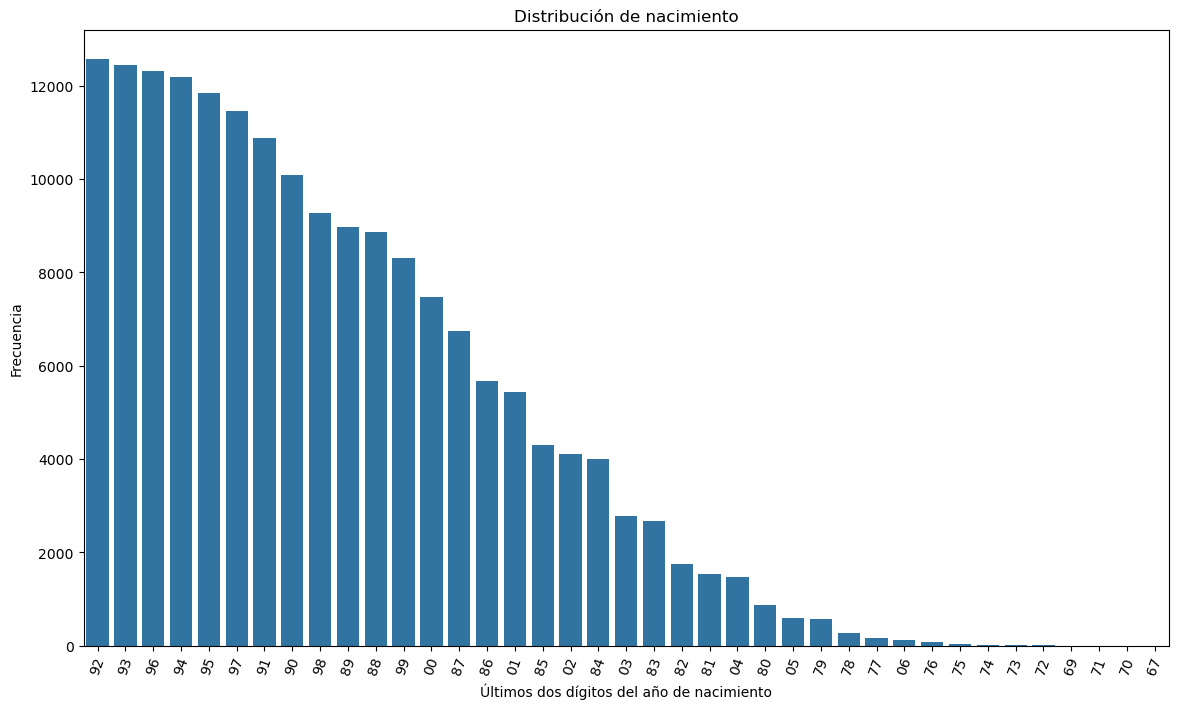

In [70]:
plt.figure(figsize=(14, 8))
sns.barplot(x=conteo_nacimientos_grupo.index, y=conteo_nacimientos_grupo.values)
plt.title("Distribución de nacimiento")
plt.xlabel("Últimos dos dígitos del año de nacimiento")
plt.ylabel("Frecuencia")
plt.xticks(rotation=70)
plt.show()

## Lista de columnas a graficar:

## nacimiento 

va a parte ya que no interesa tener el cuenta solo el año y no el valor completo

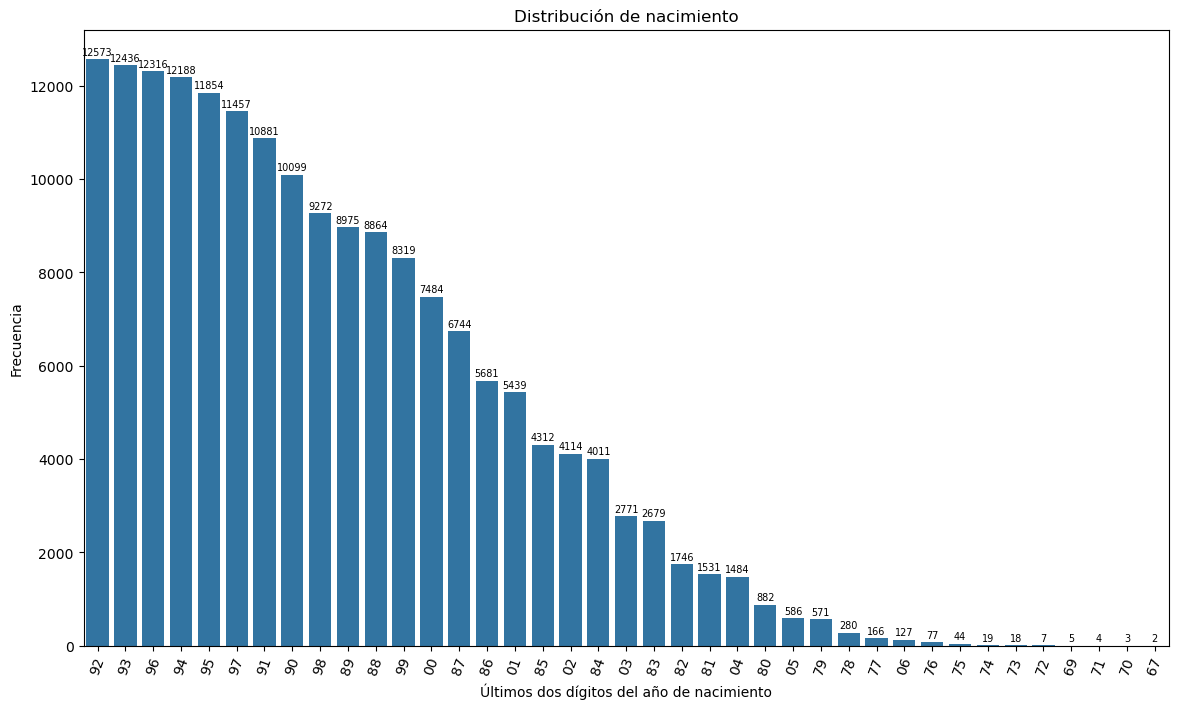

In [73]:
# Crear una variable temporal con los dos últimos dígitos de 'nacimiento'
nacimiento_grupo = data['nacimiento'].astype(str).str[-2:]

# Contar las ocurrencias de cada grupo de 'nacimiento' basado en los dos últimos dígitos
conteo_nacimientos_grupo = nacimiento_grupo.value_counts()

plt.figure(figsize=(14, 8))
ax = sns.barplot(x=conteo_nacimientos_grupo.index, y=conteo_nacimientos_grupo.values)
plt.title("Distribución de nacimiento")
plt.xlabel("Últimos dos dígitos del año de nacimiento")
plt.ylabel("Frecuencia")
plt.xticks(rotation=70)

# Agregar los valores exactos sobre cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points',size=7)

plt.show()

#Observacion exploratoria:

Predomina los del 90, luego entre los mas jovenes (00 en adelante) y mayores (80), y por ultimo los del 70

### procedemos con el resto de las columnas:

'posiciones', 'nacimiento', 'nacionalidad', 'pierna', 'nombre_club_y', 'nombre_liga_y', 'nacion_liga',
    'est_general_x', 'valor_de_mercado', 'salario_semanal', 'edad', 'ritmo', 'chut', 'pase', 'regate', 
    'defensa_x', 'fisico', 'centros_ataque', 'finalizacion', 'remate_cabeza', 'pase_corto_ataque', 'volea', 
    'habilidad_regate', 'efecto', 'eficacia_faltas', 'habilidad_pase_largo', 'habilidad_control', 
    'aceleracion', 'velocidad_max', 'agilidad', 'reaccion', 'equilibrio', 'potencia_tiro', 'potencia_salto', 
    'aguante', 'fortaleza', 'fuerza_chuts_lejanos', 'agresividad', 'anticipacion', 'posicionamiento', 
    'vision_juego', 'penalties', 'marcaje', 'abordaje', 'entrada', 'estirada', 'manejo', 'pateo', 
    'posicion_por', 'reflejos', 'velocidad_por', 'altura', 'nombre_club_y', 'nombre_liga_y', 'nacion_liga', 
    'est_general_y', 'ataque', 'mediocampo', 'defensa_y', 'promedio_edad_titulares', 'promedio_edad_equipo'

In [76]:
columnas = [
    'posiciones', 'nacionalidad', 'pierna', 'nombre_club_y', 'nombre_liga_y', 'nacion_liga',
    'est_general_x', 'valor_de_mercado', 'salario_semanal', 'edad', 'ritmo', 'chut', 'pase', 'regate', 
    'defensa_x', 'fisico', 'centros_ataque', 'finalizacion', 'remate_cabeza', 'pase_corto_ataque', 'volea', 
    'habilidad_regate', 'efecto', 'eficacia_faltas', 'habilidad_pase_largo', 'habilidad_control', 
    'aceleracion', 'velocidad_max', 'agilidad', 'reaccion', 'equilibrio', 'potencia_tiro', 'potencia_salto', 
    'aguante', 'fortaleza', 'fuerza_chuts_lejanos', 'agresividad', 'anticipacion', 'posicionamiento', 
    'vision_juego', 'penalties', 'marcaje', 'abordaje', 'entrada', 'estirada', 'manejo', 'pateo', 
    'posicion_por', 'reflejos', 'velocidad_por', 'altura', 'nombre_club_y', 'nombre_liga_y', 'nacion_liga', 
    'est_general_y', 'ataque', 'mediocampo', 'defensa_y', 'promedio_edad_titulares', 'promedio_edad_equipo'
]

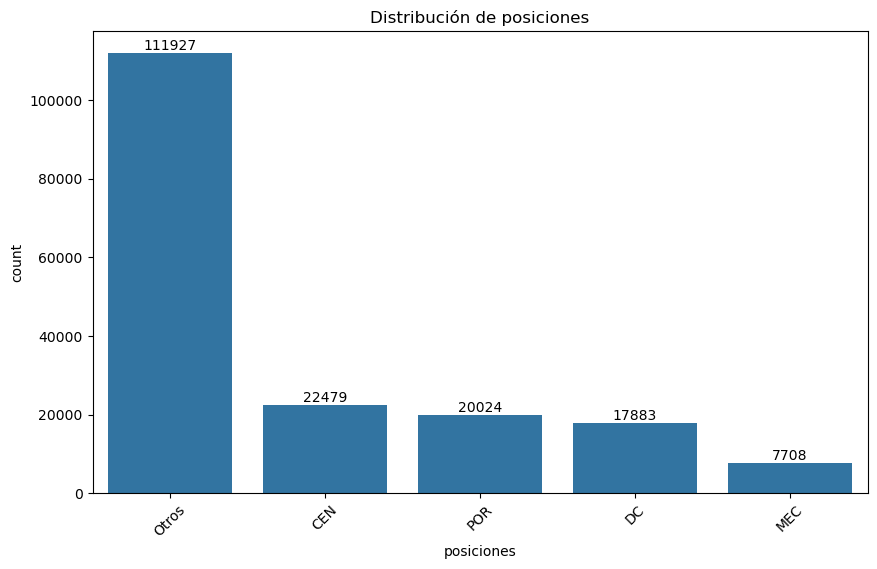

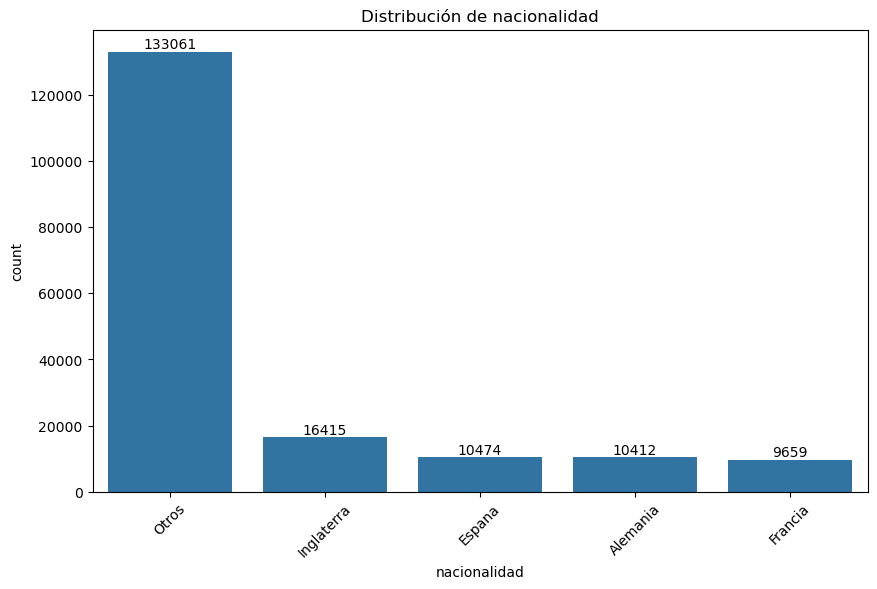

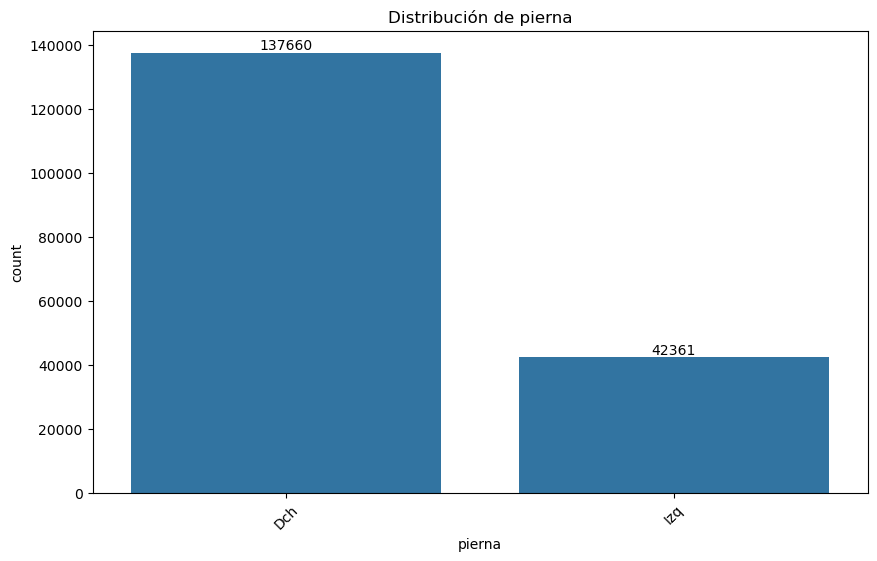

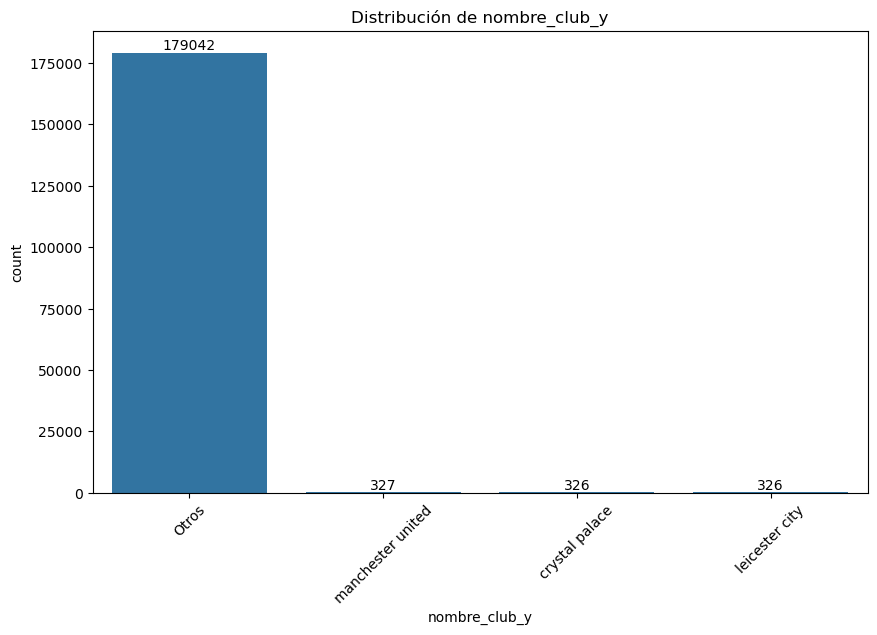

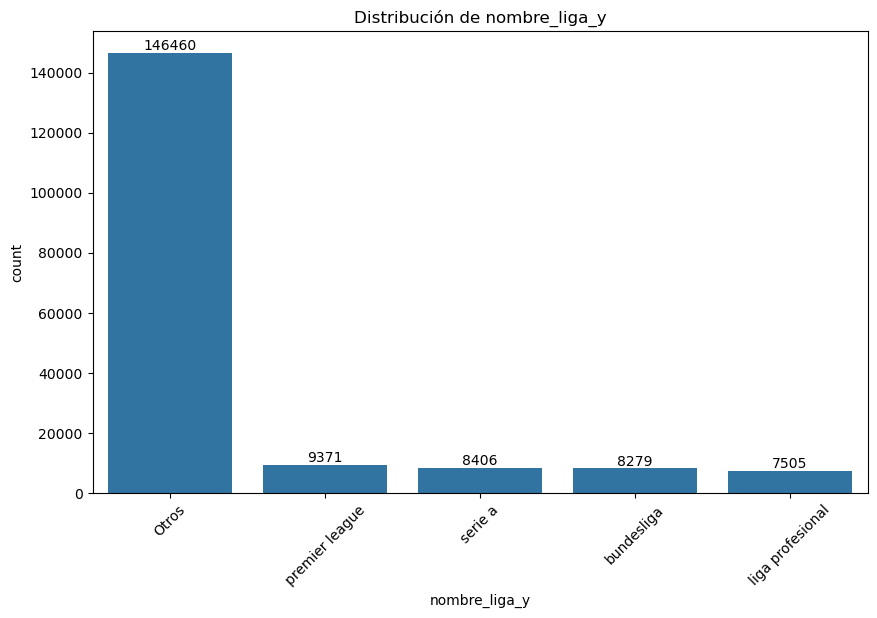

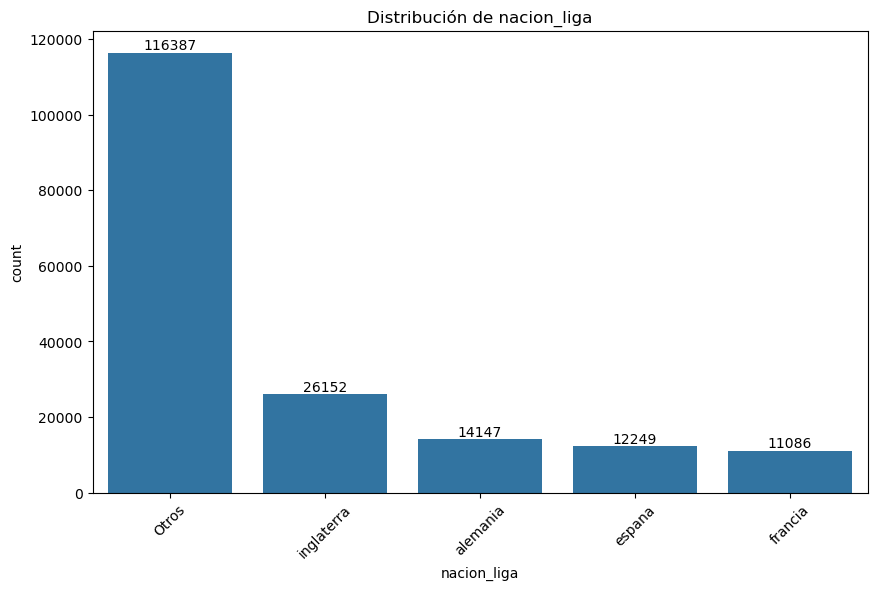

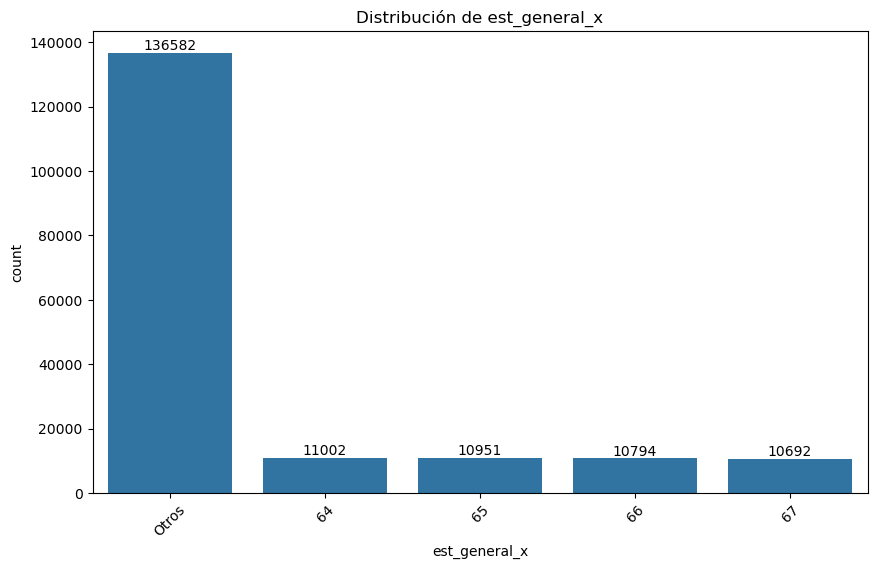

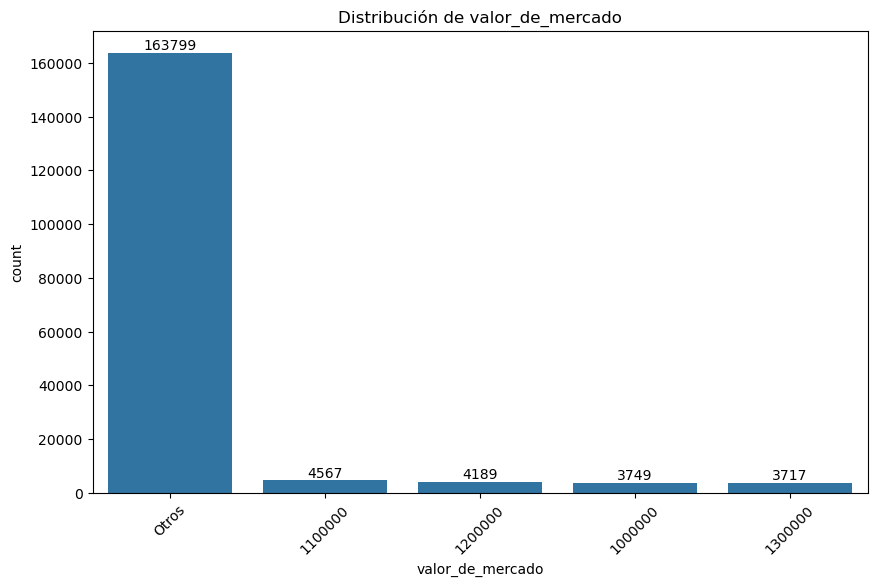

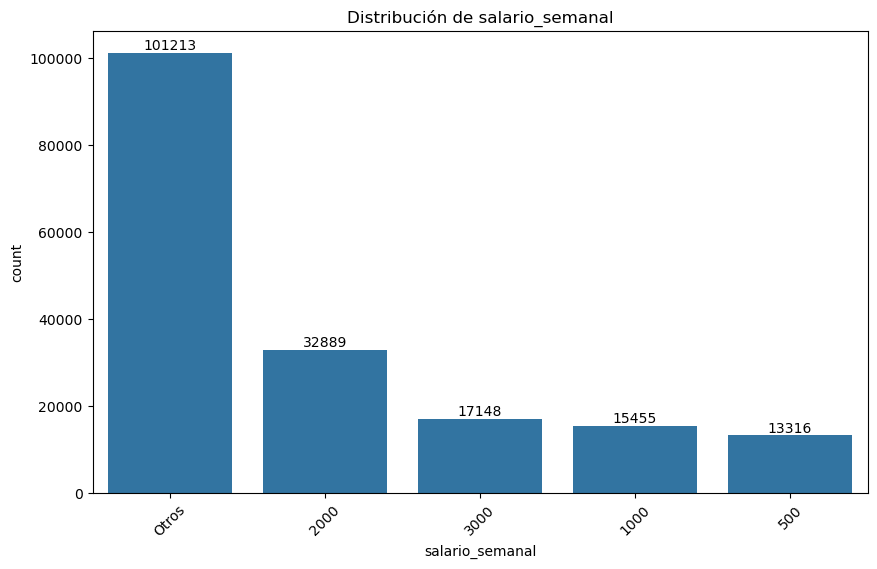

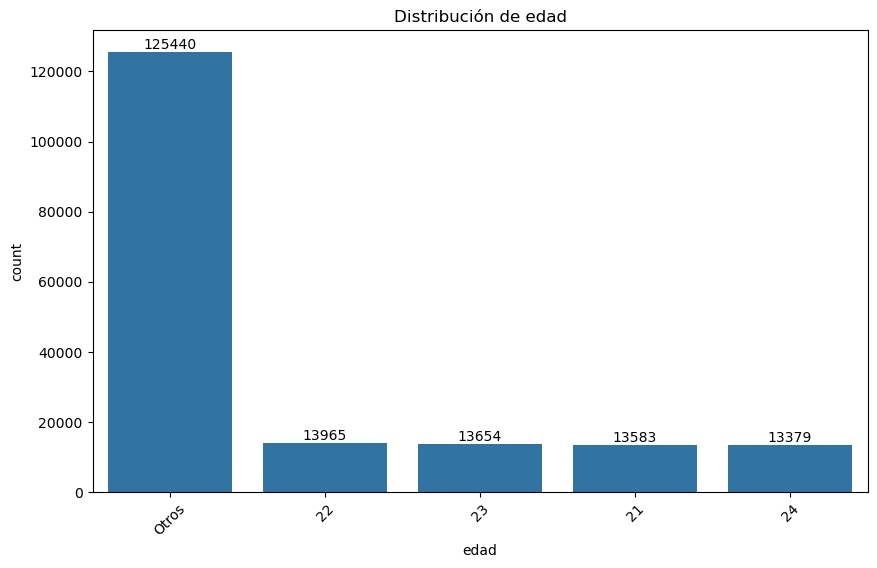

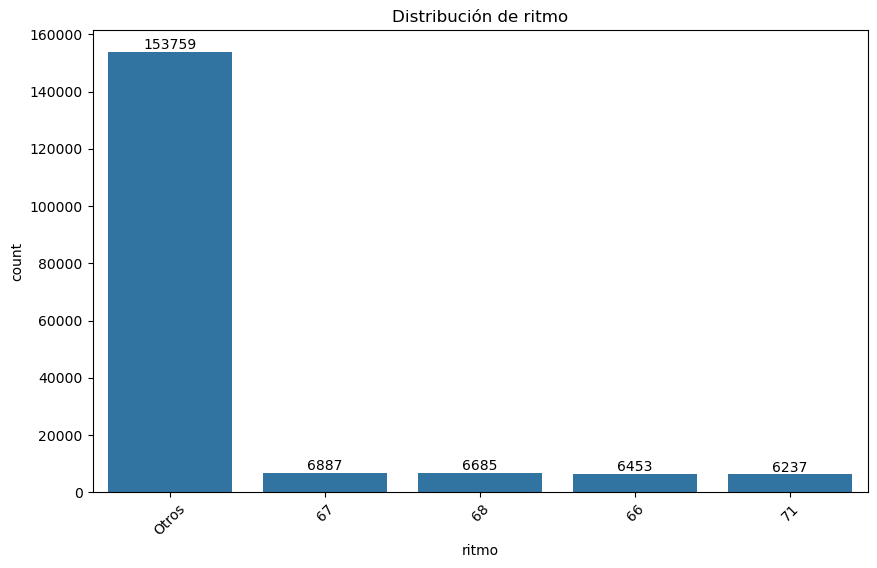

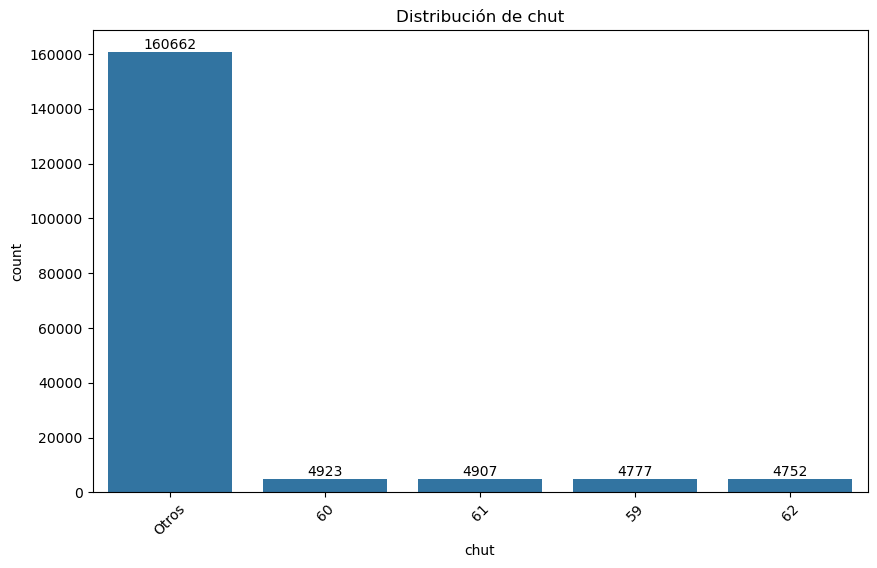

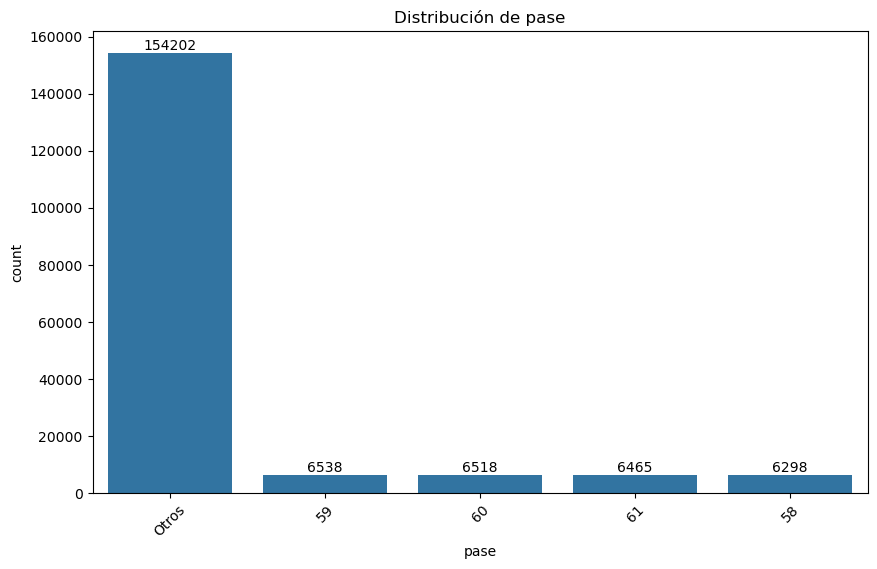

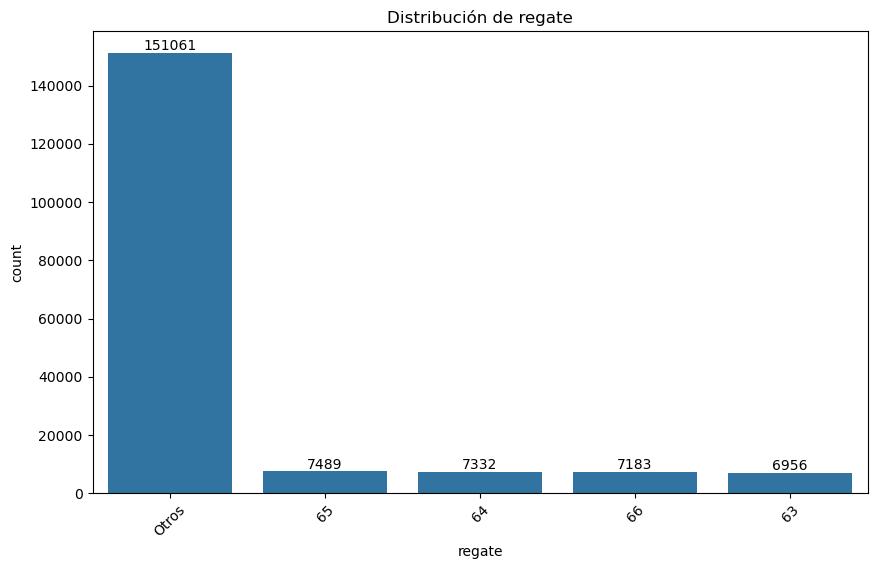

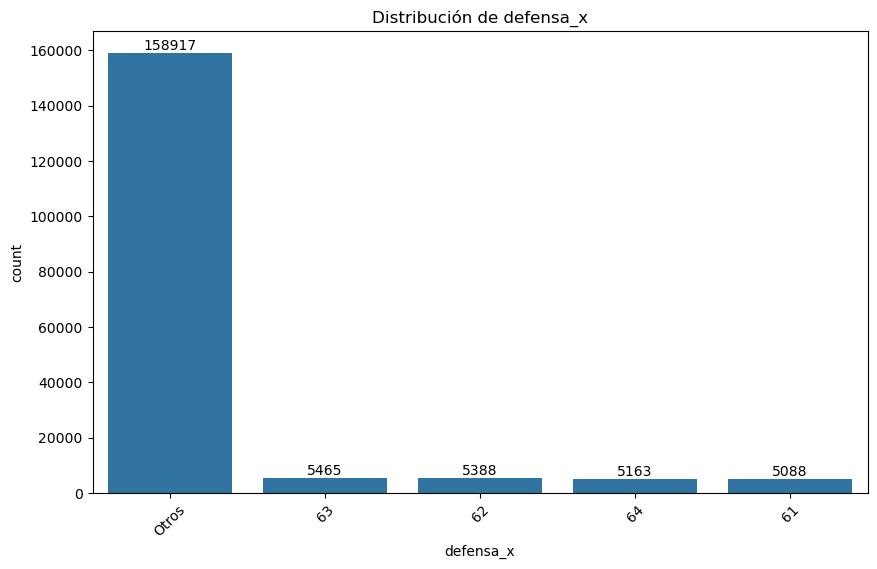

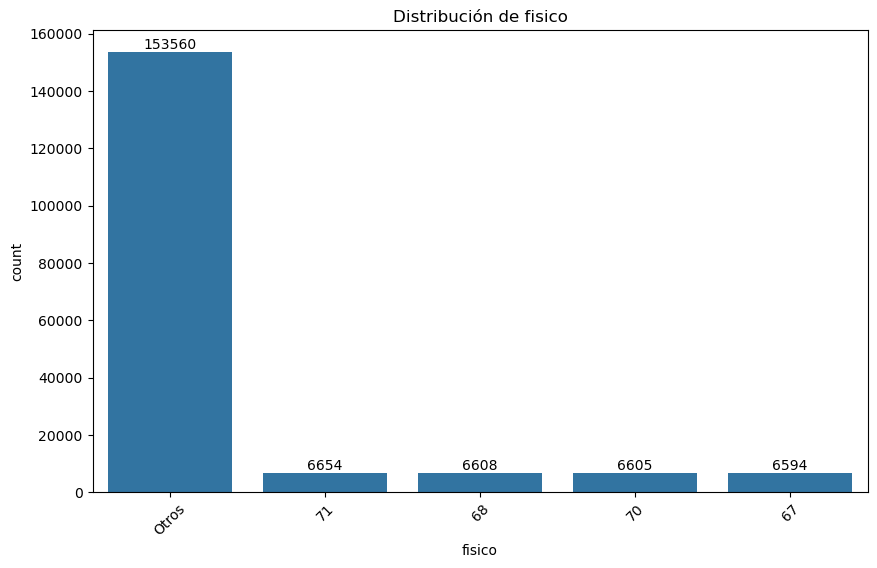

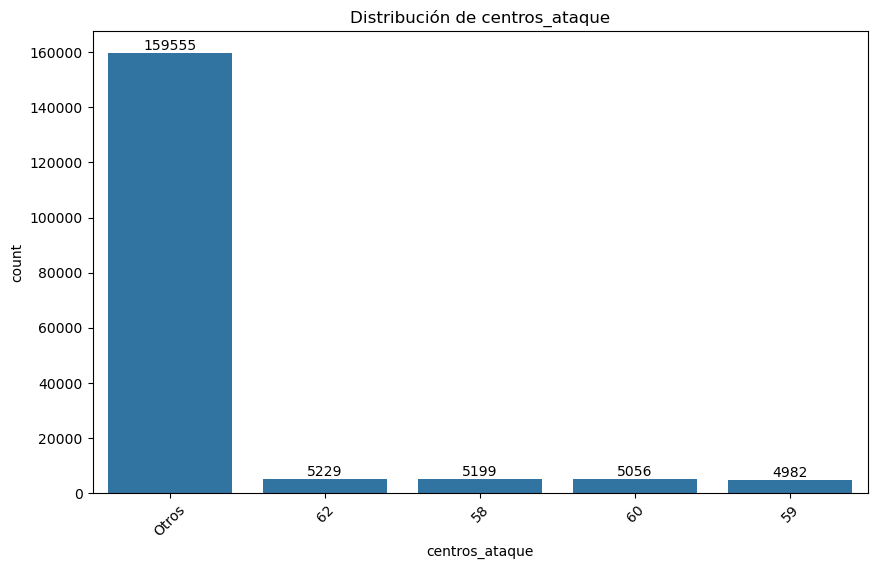

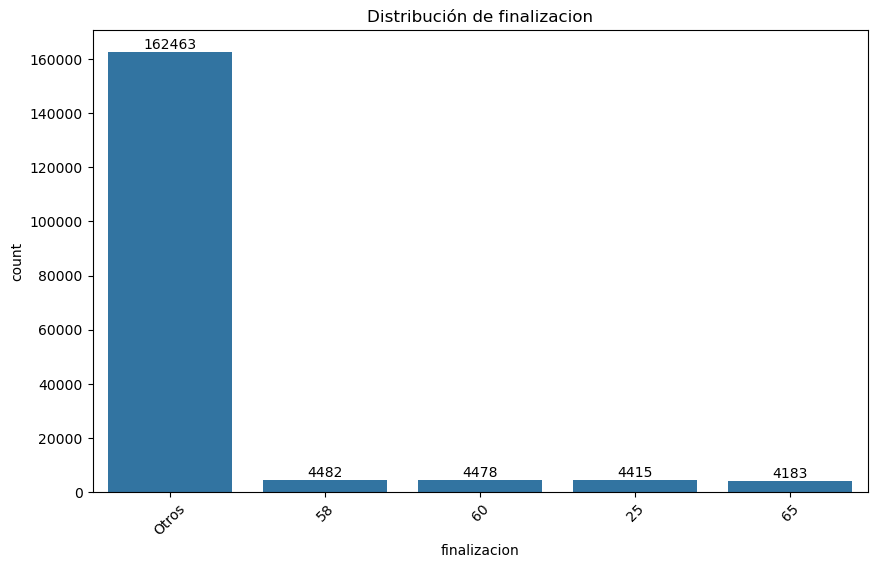

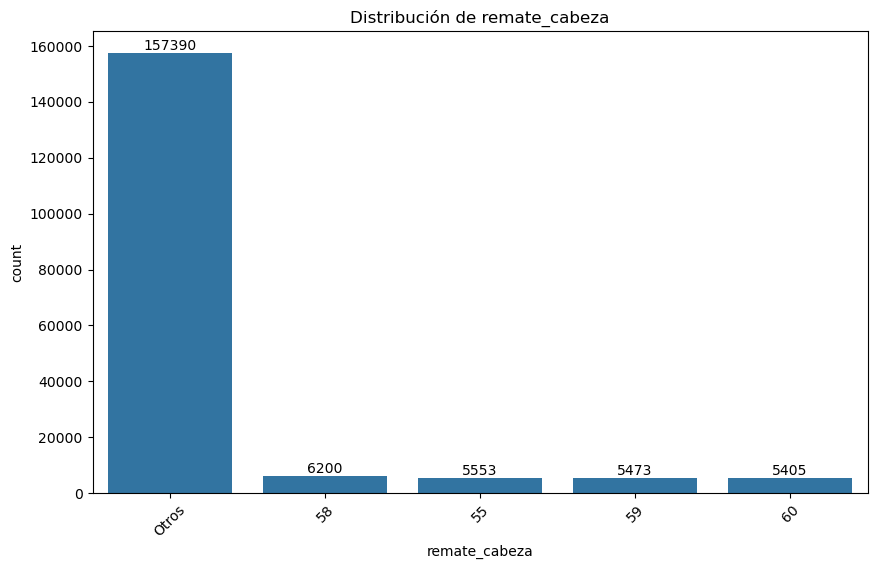

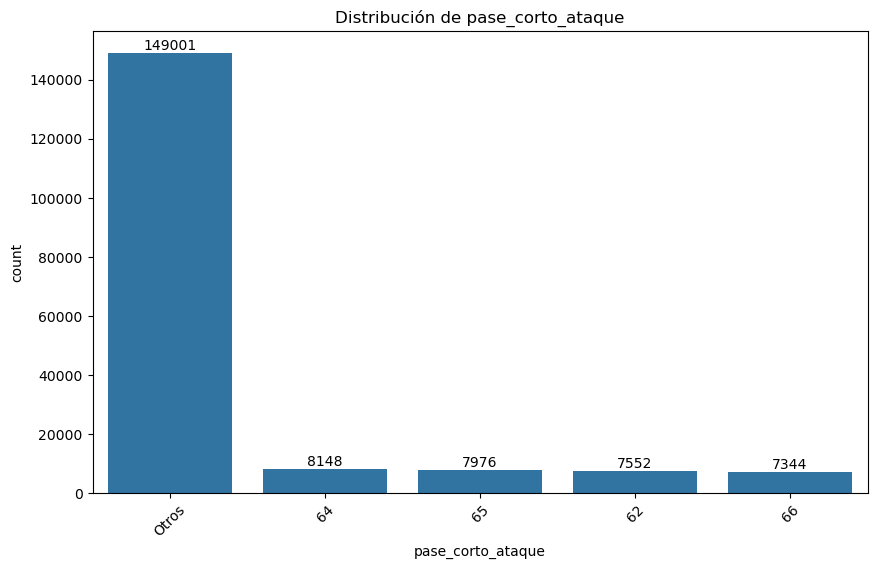

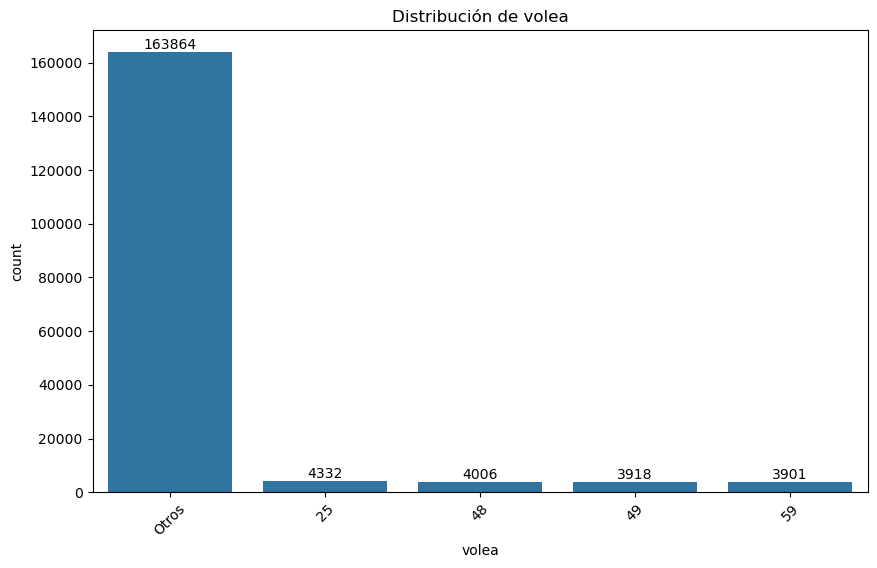

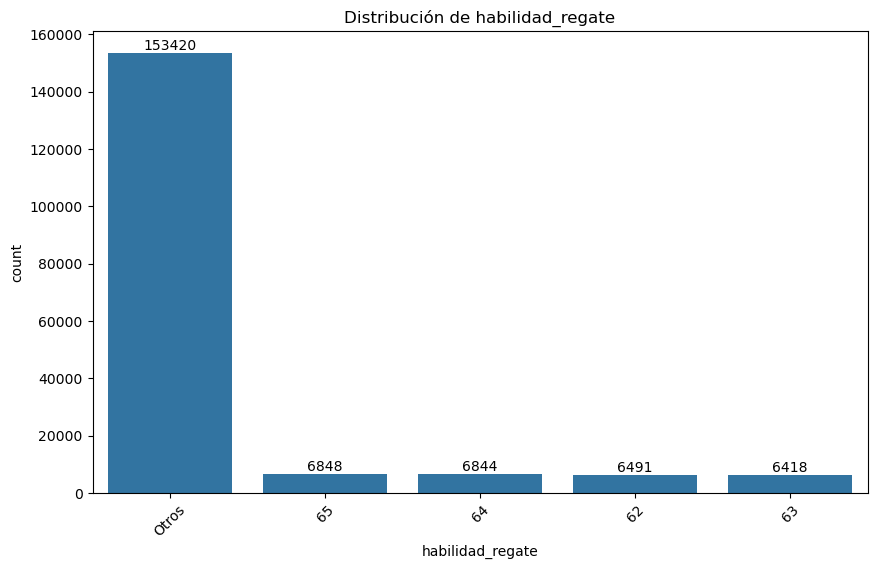

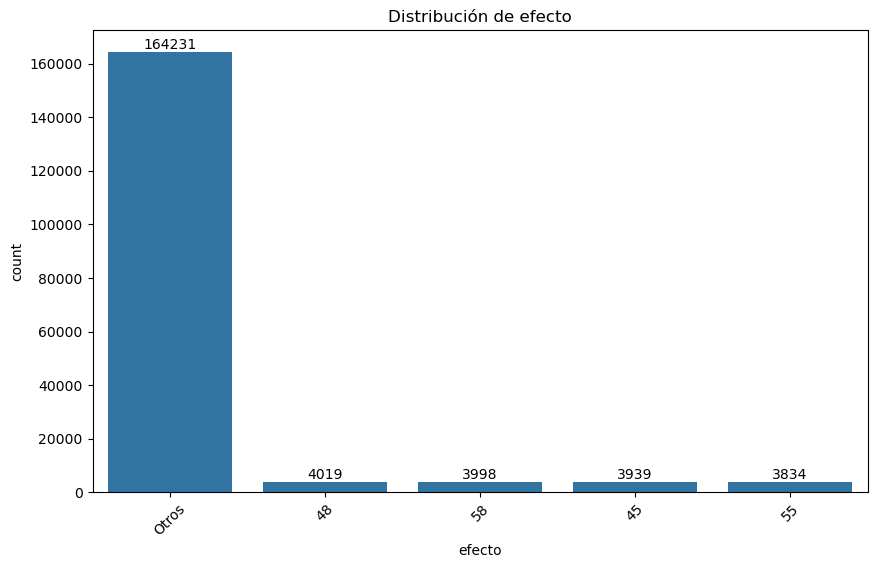

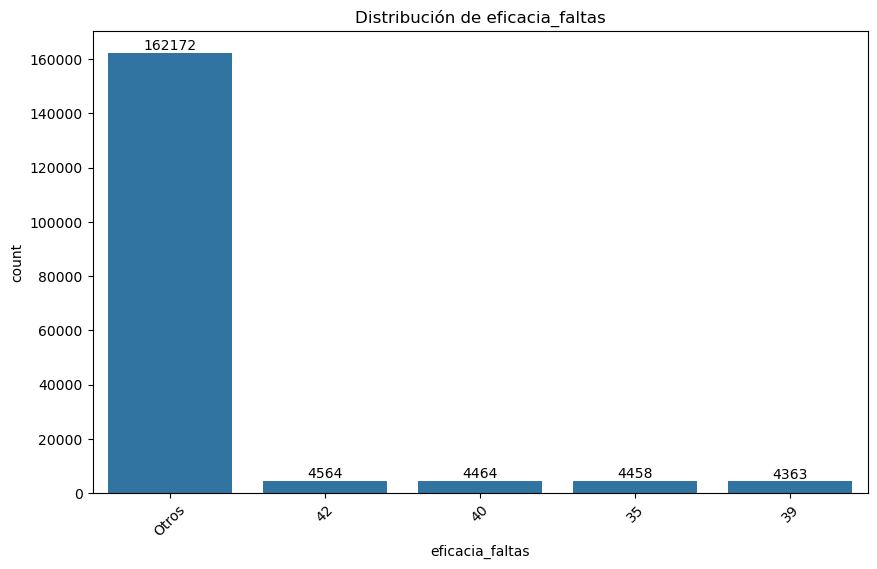

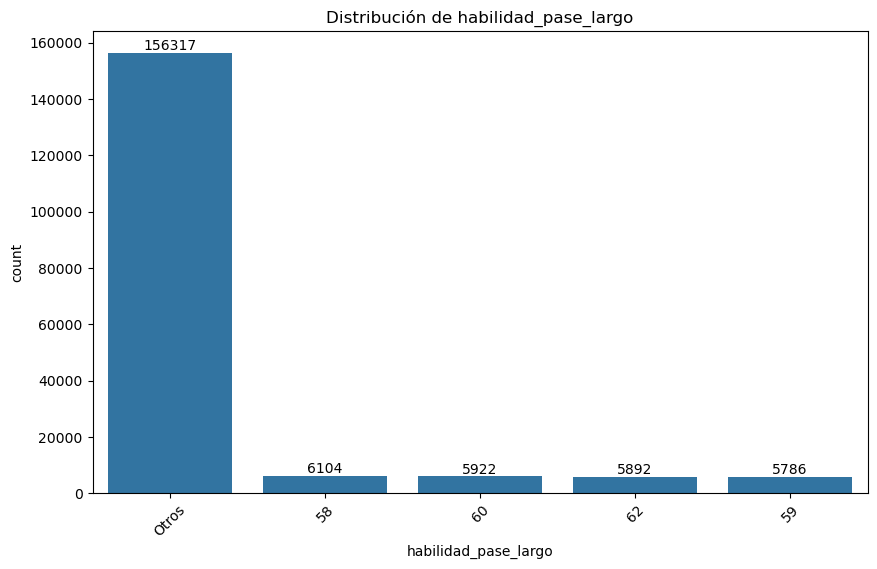

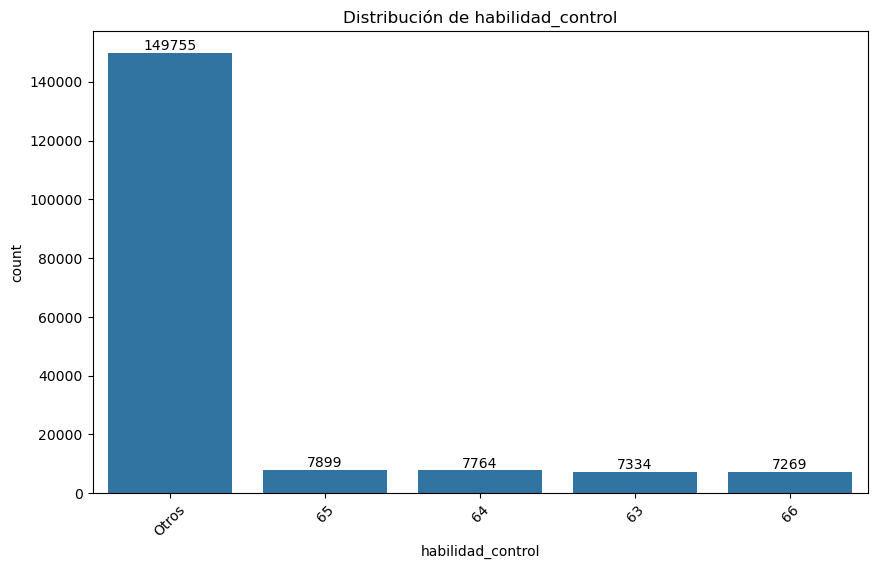

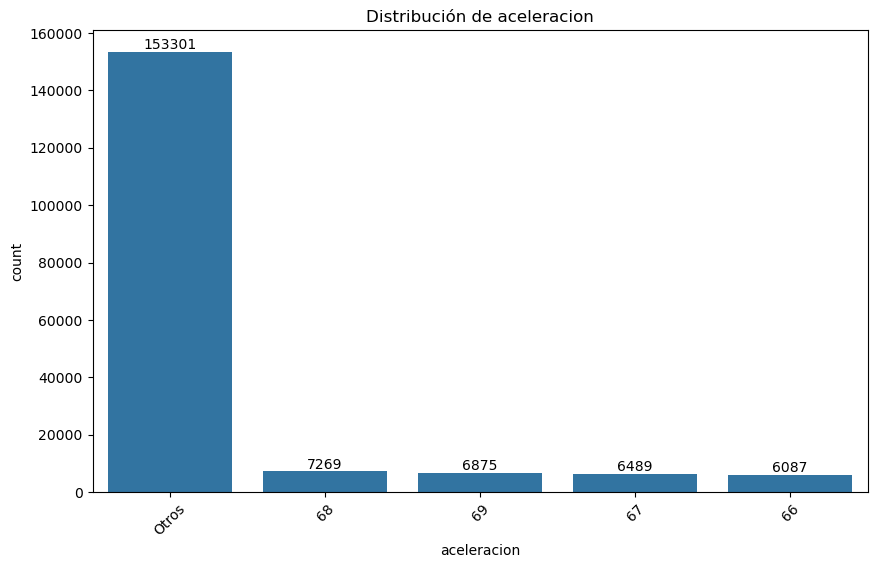

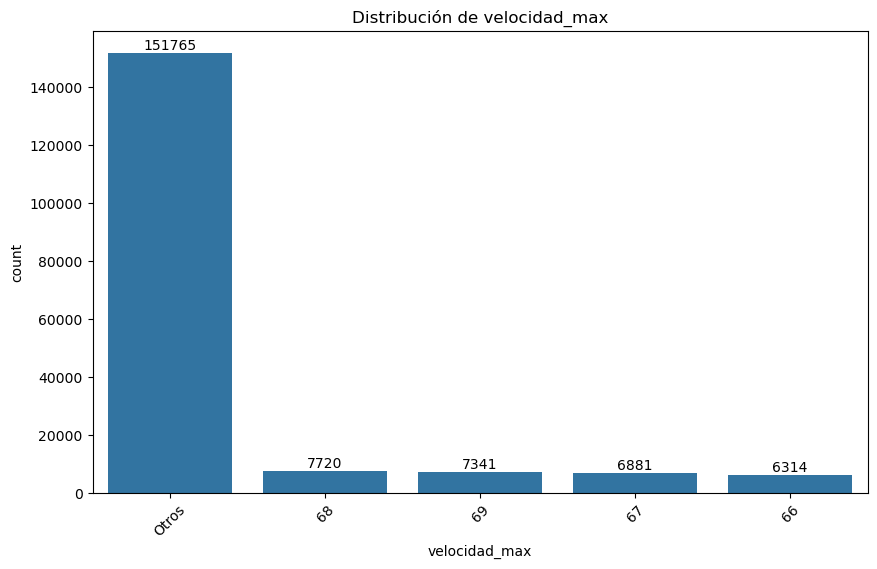

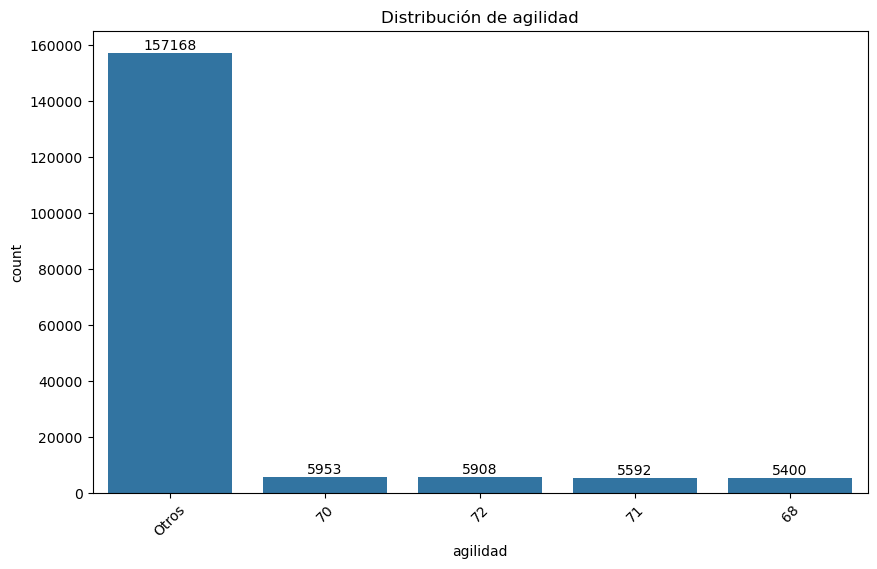

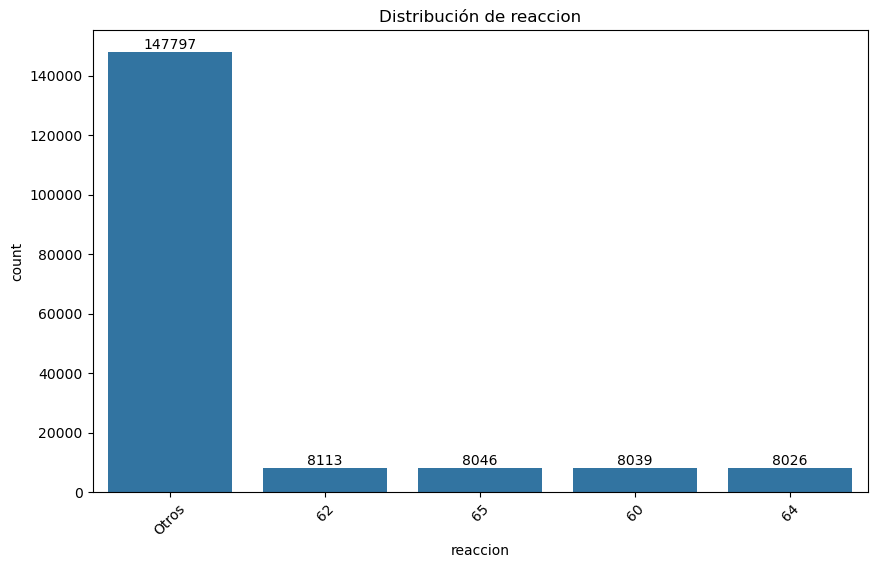

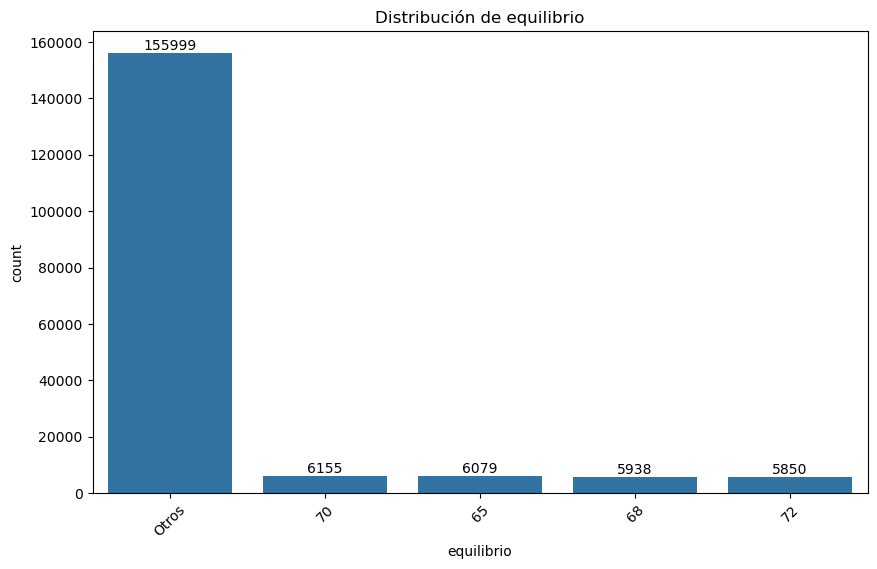

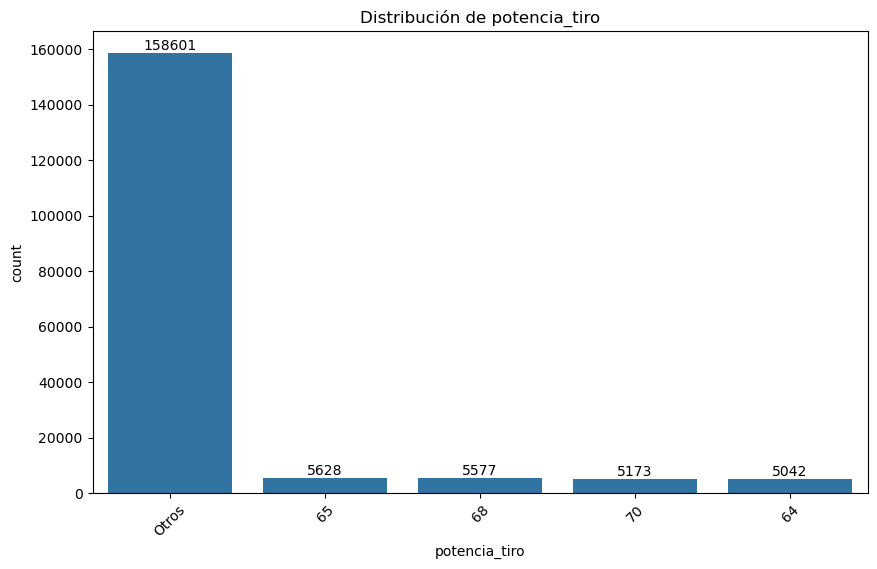

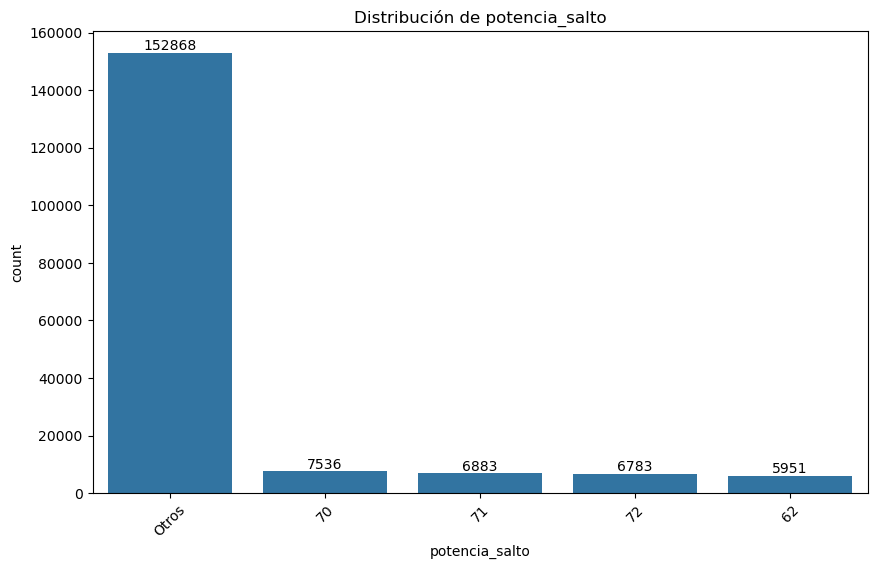

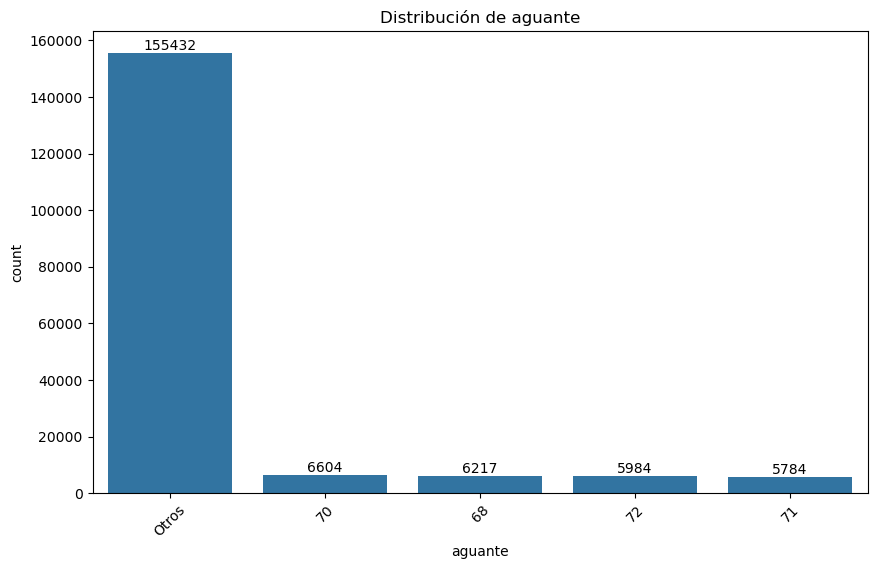

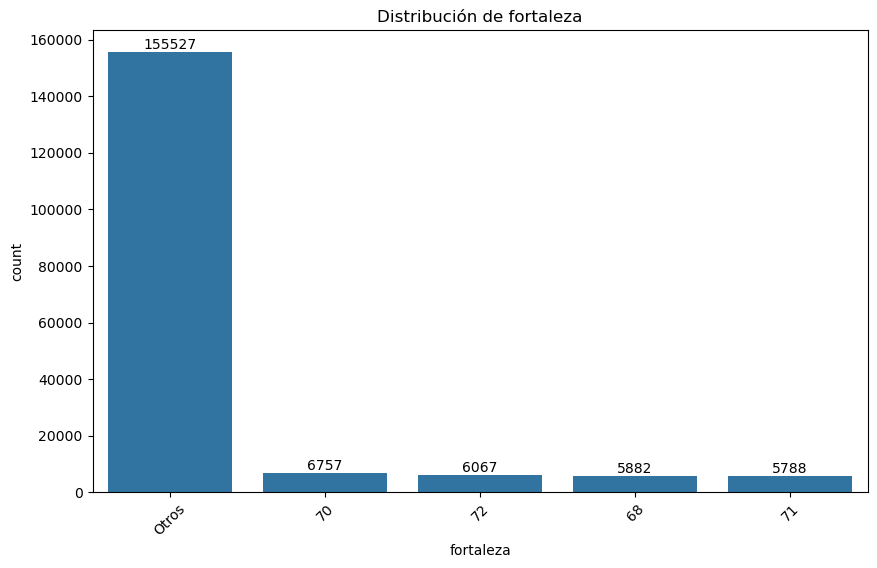

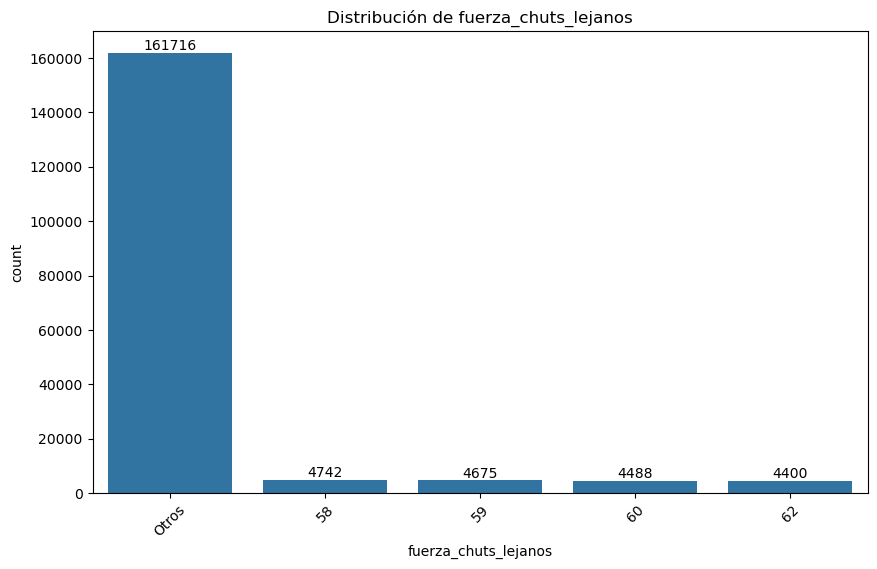

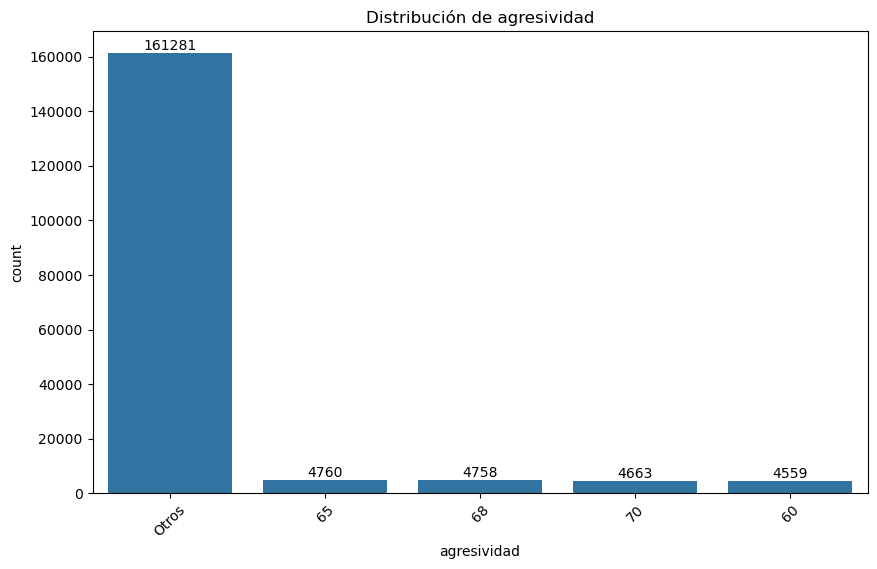

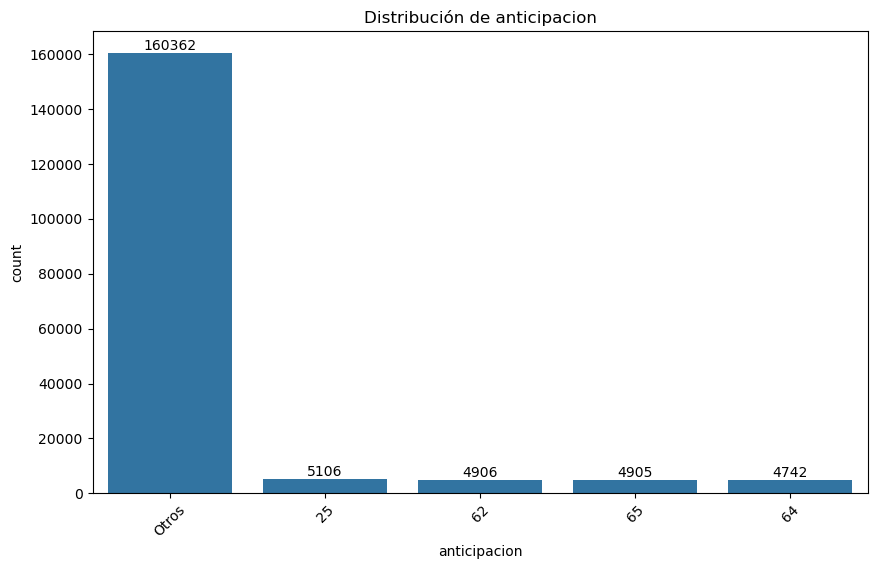

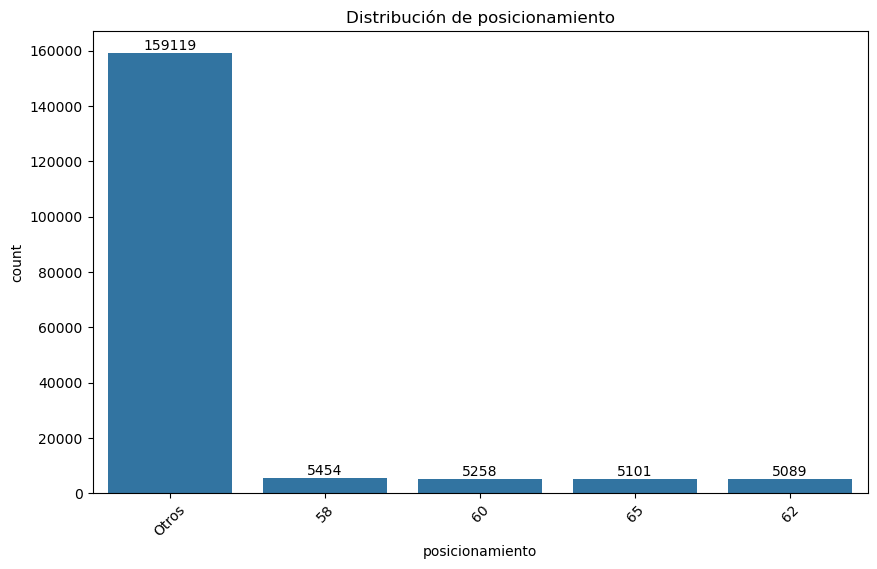

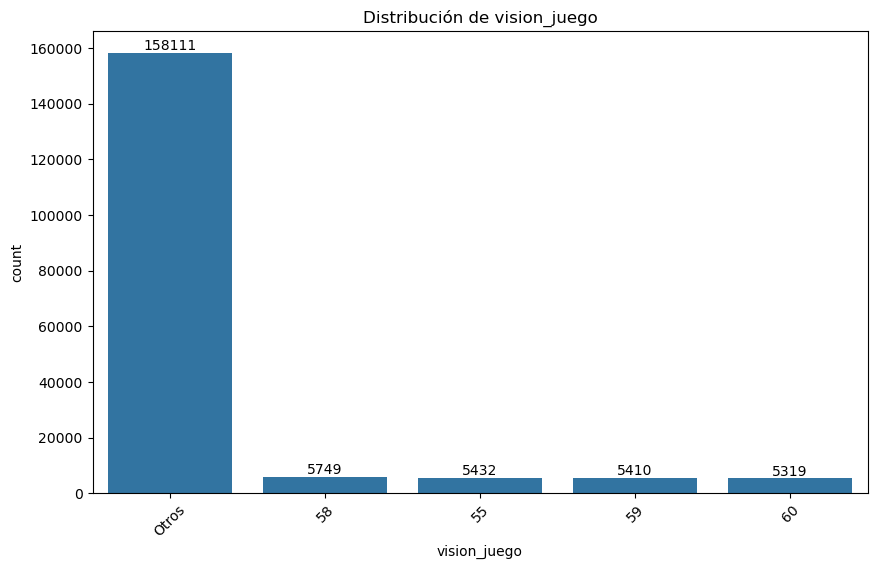

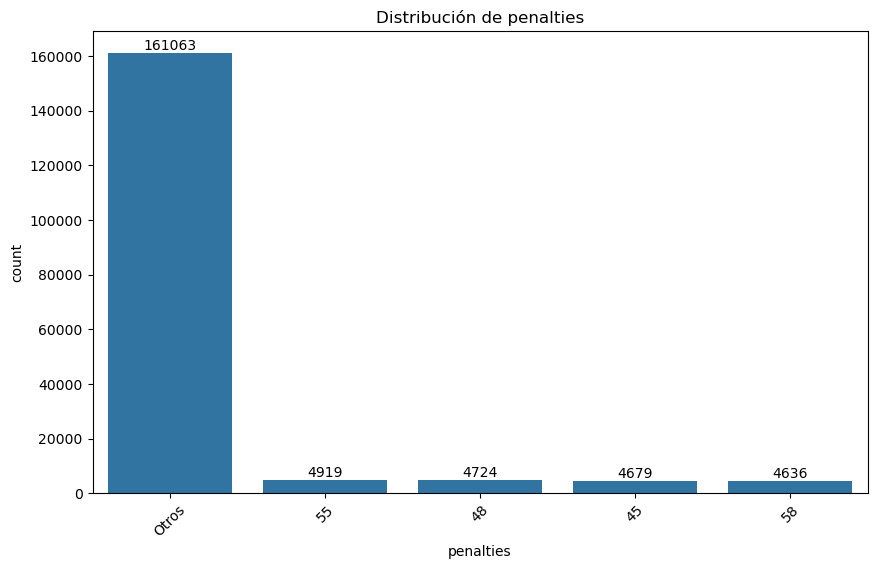

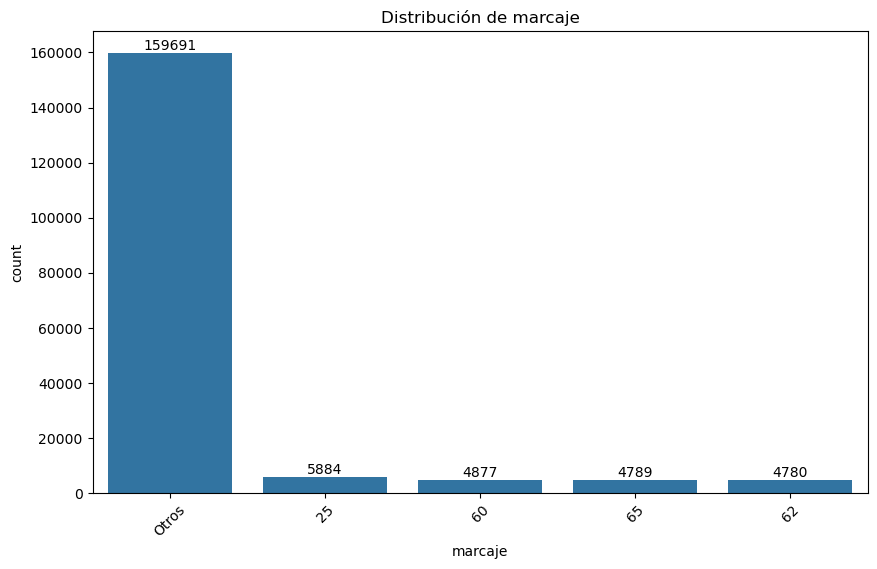

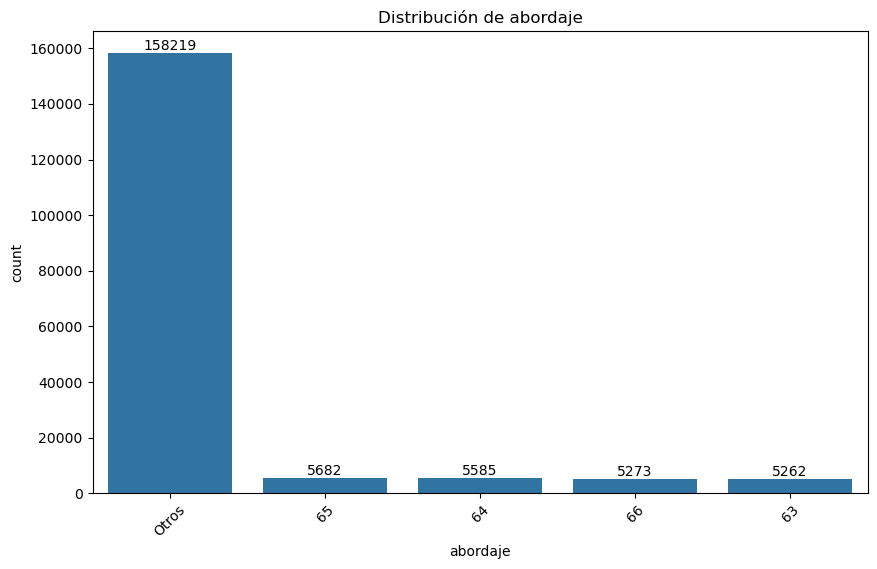

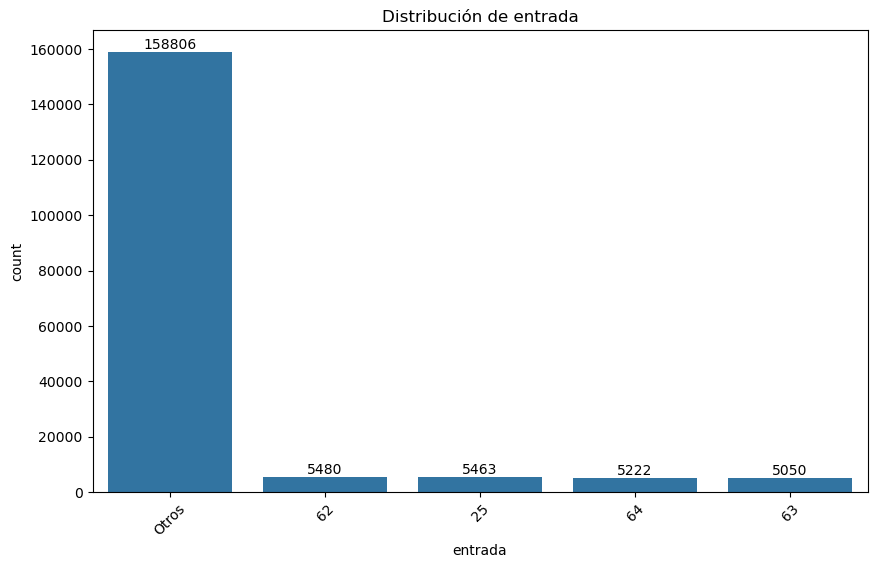

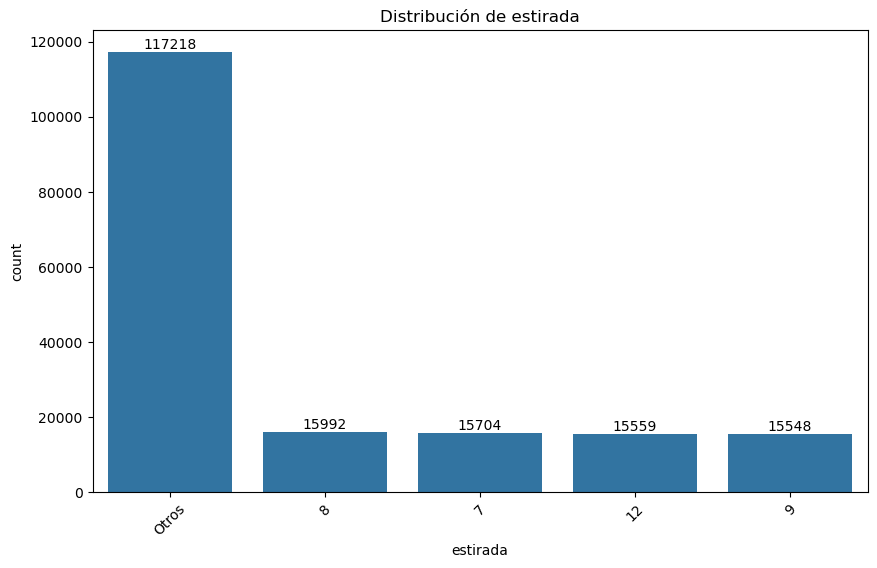

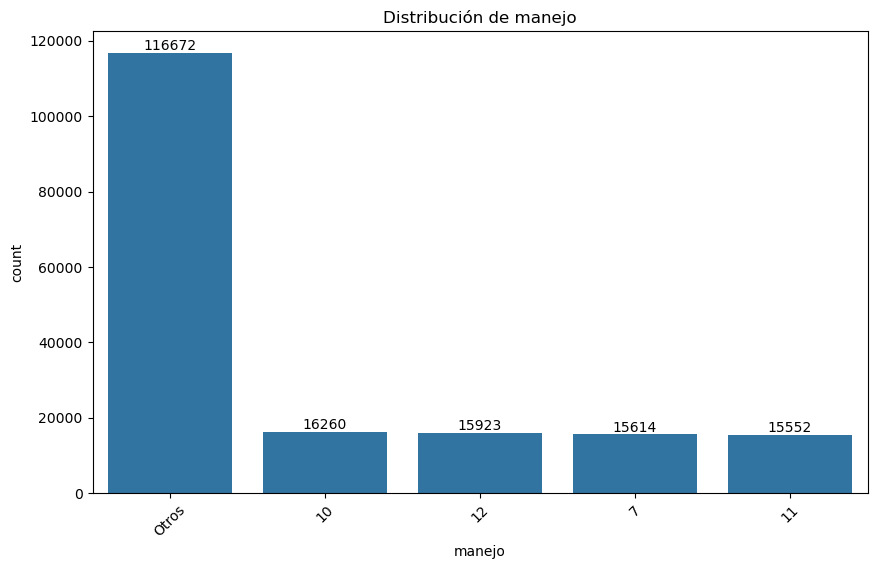

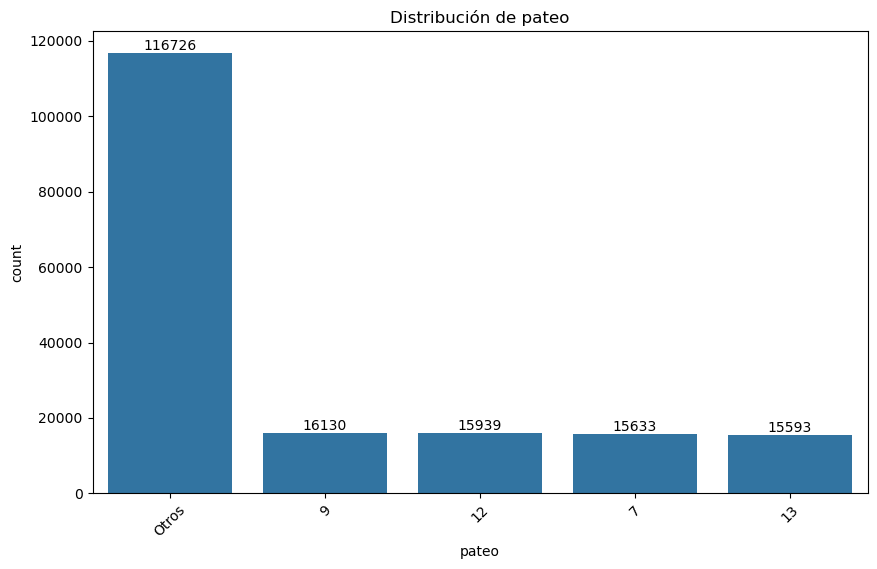

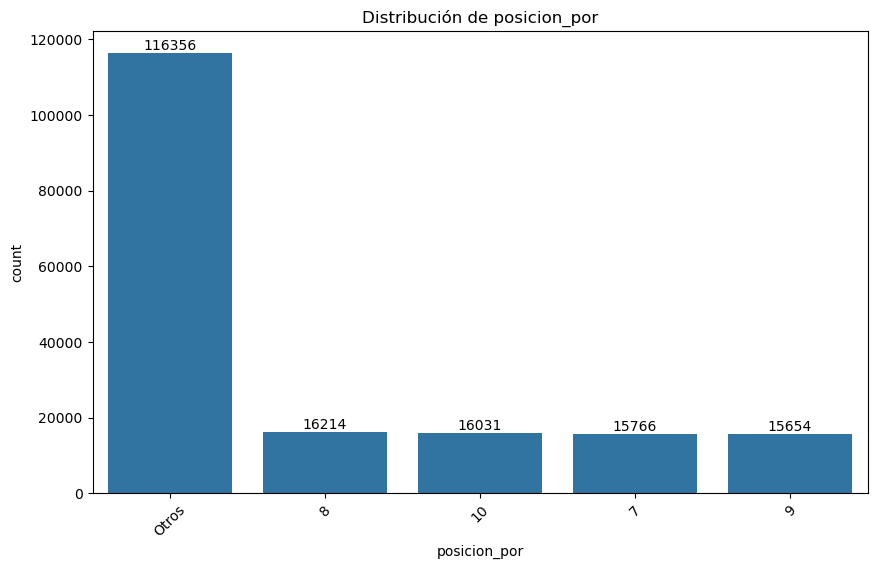

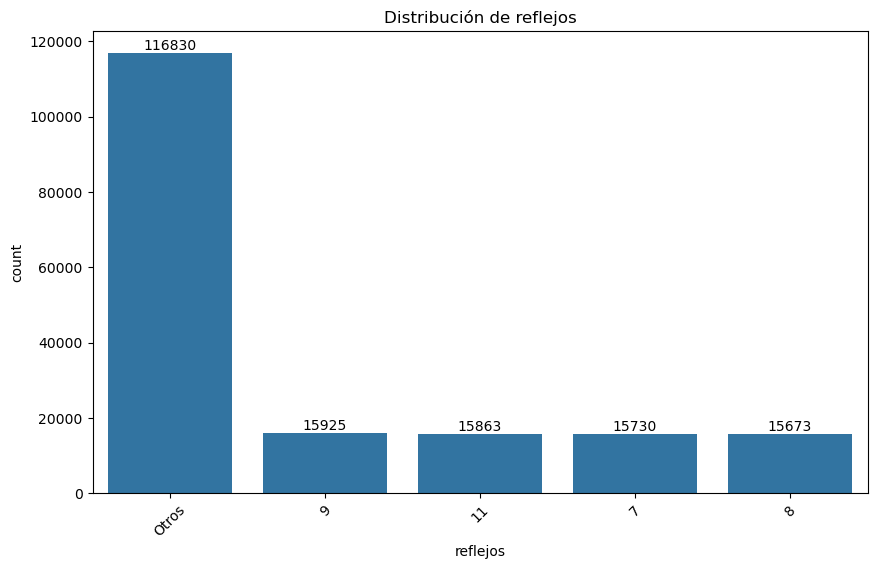

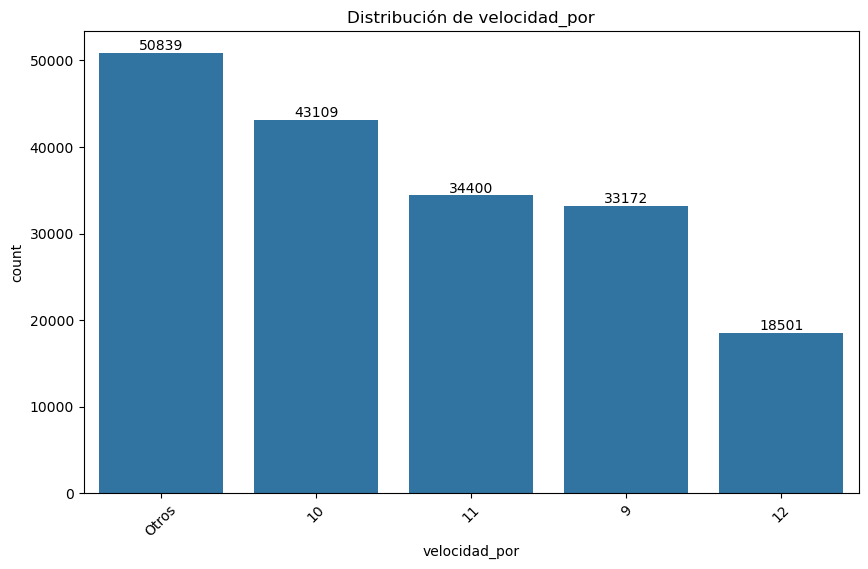

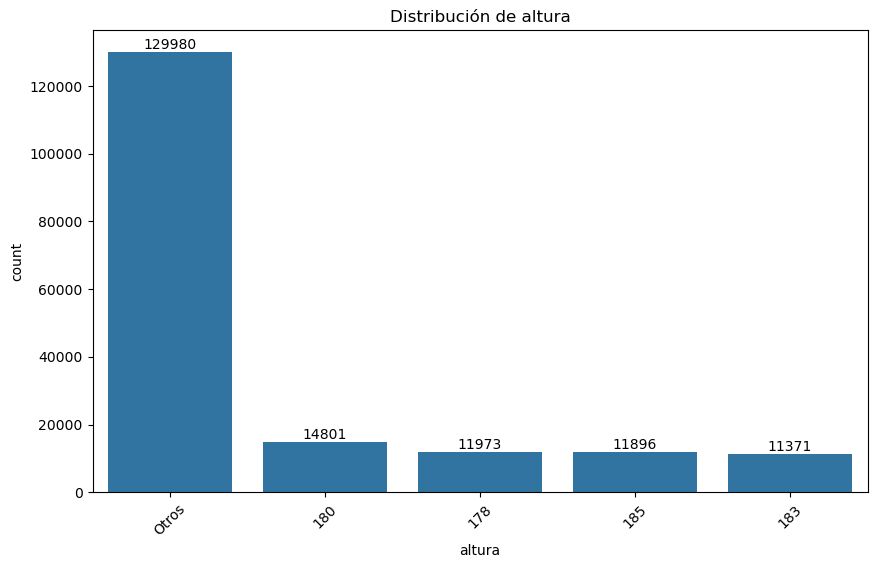

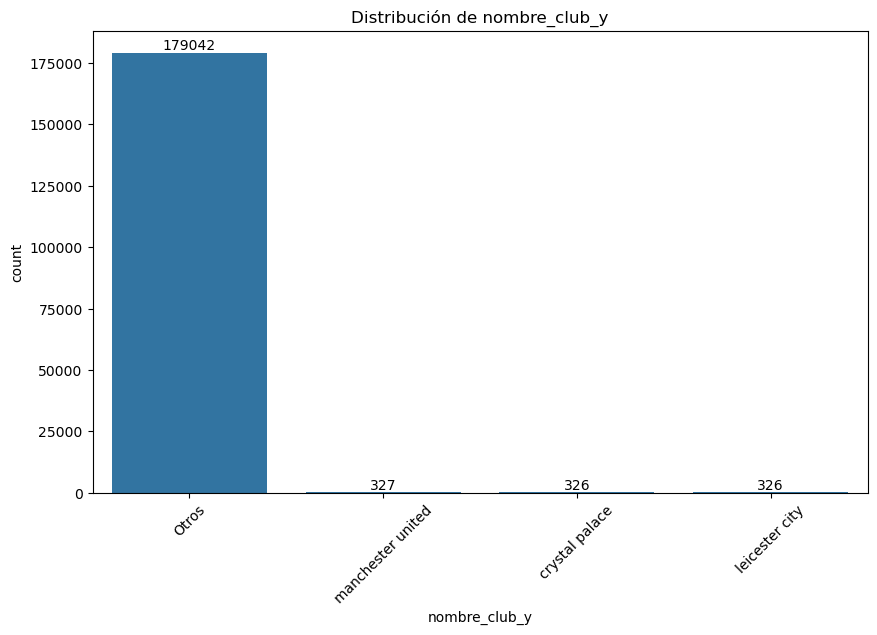

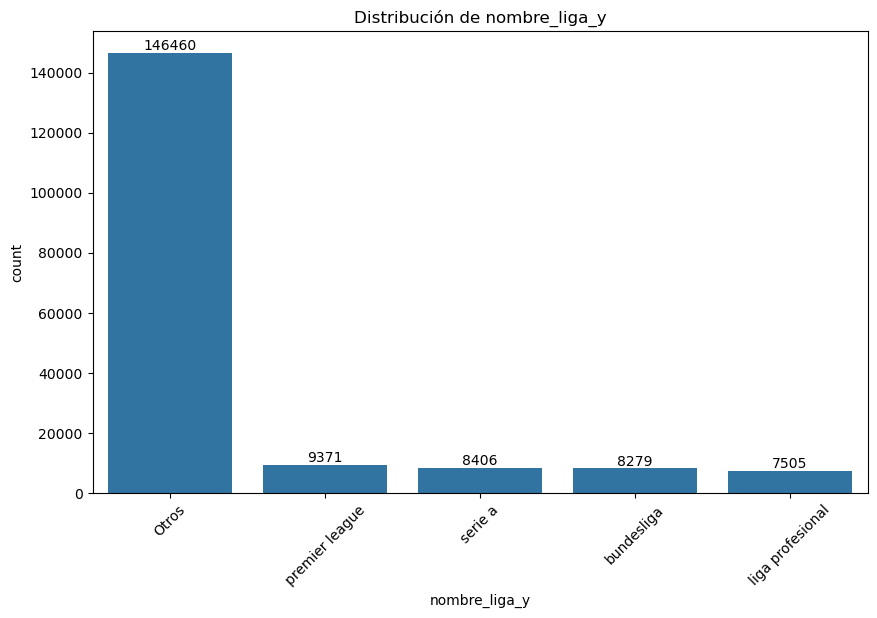

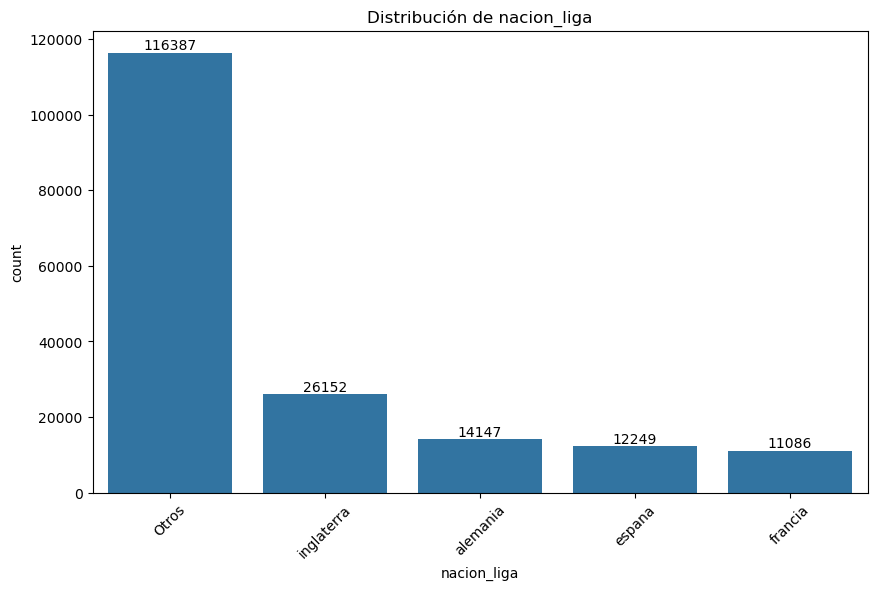

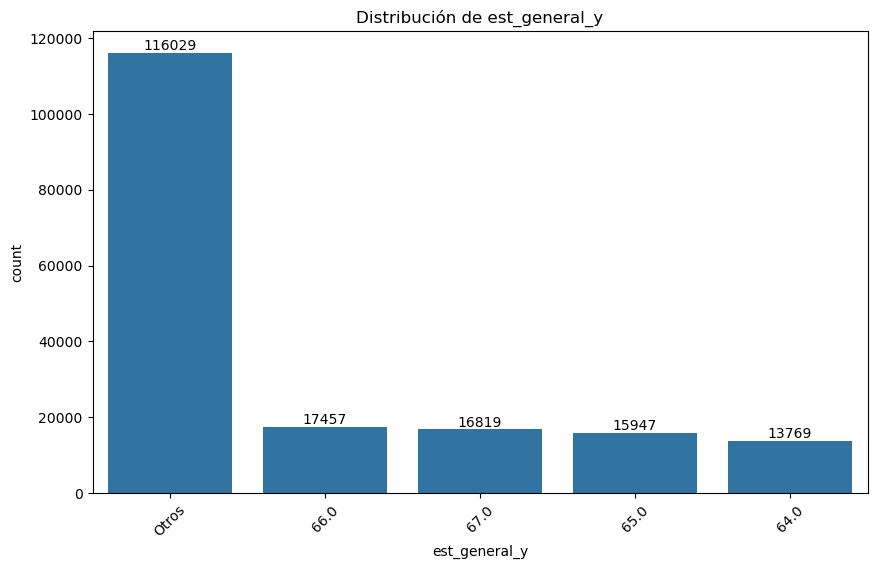

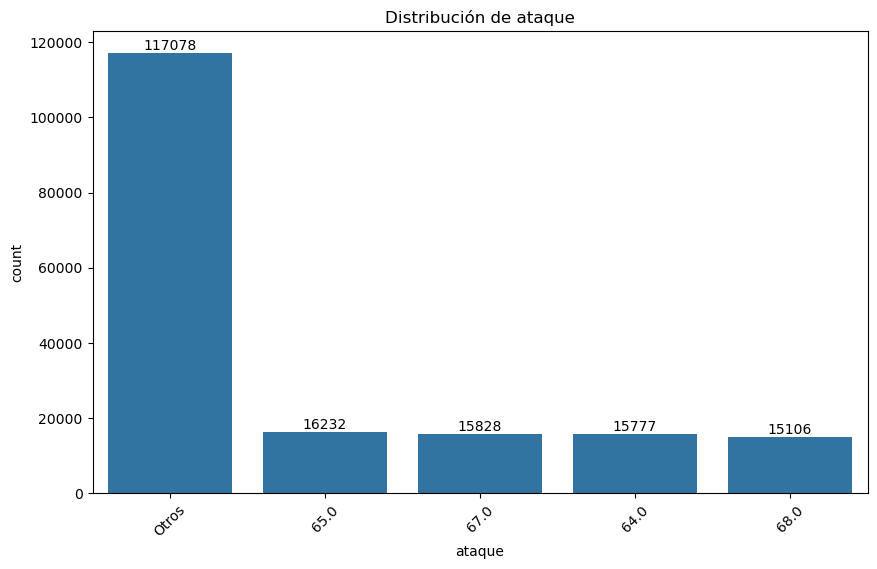

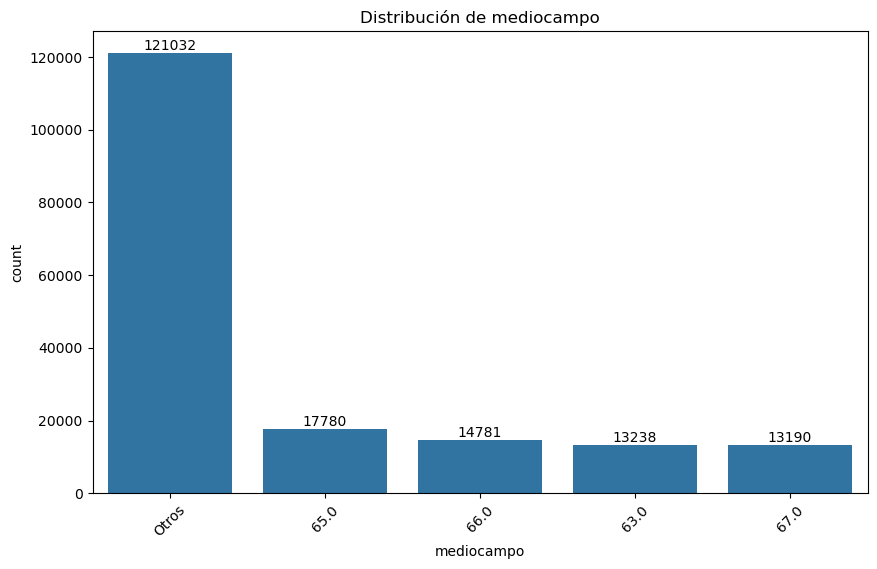

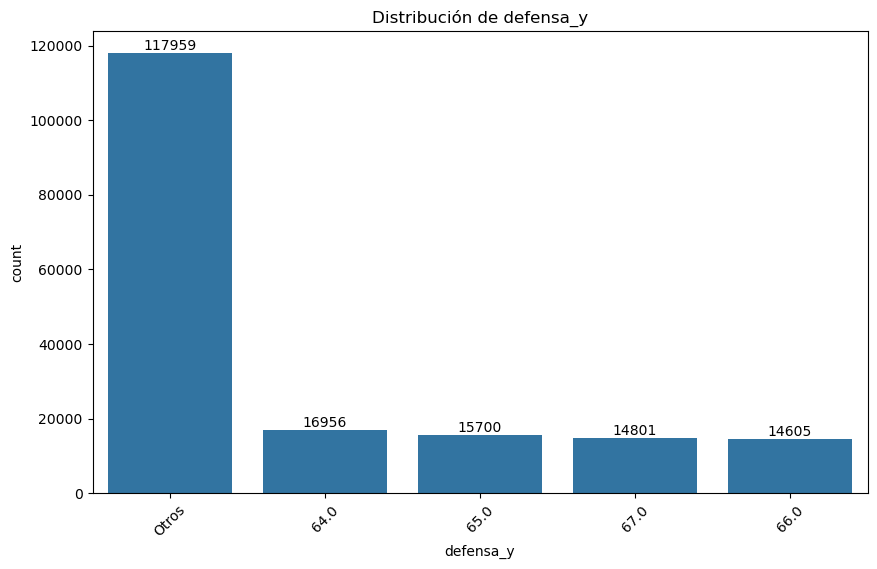

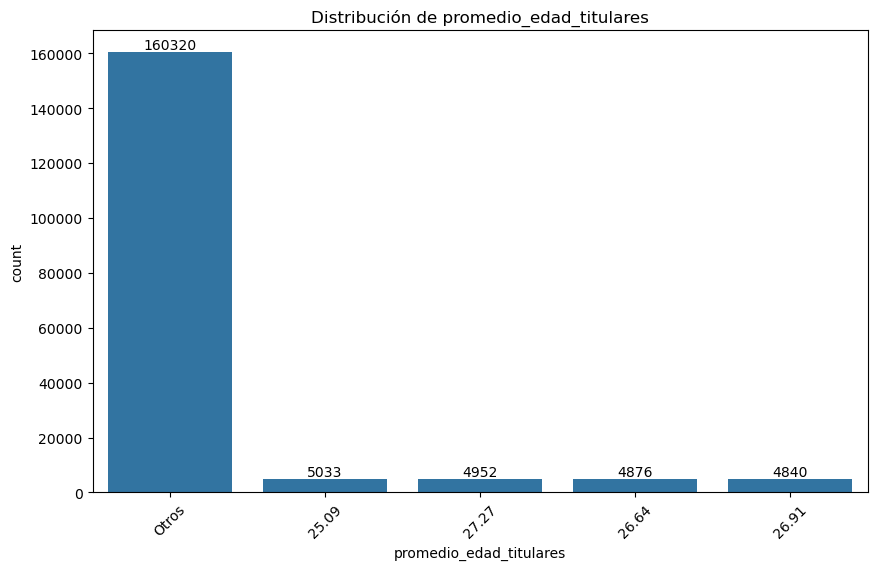

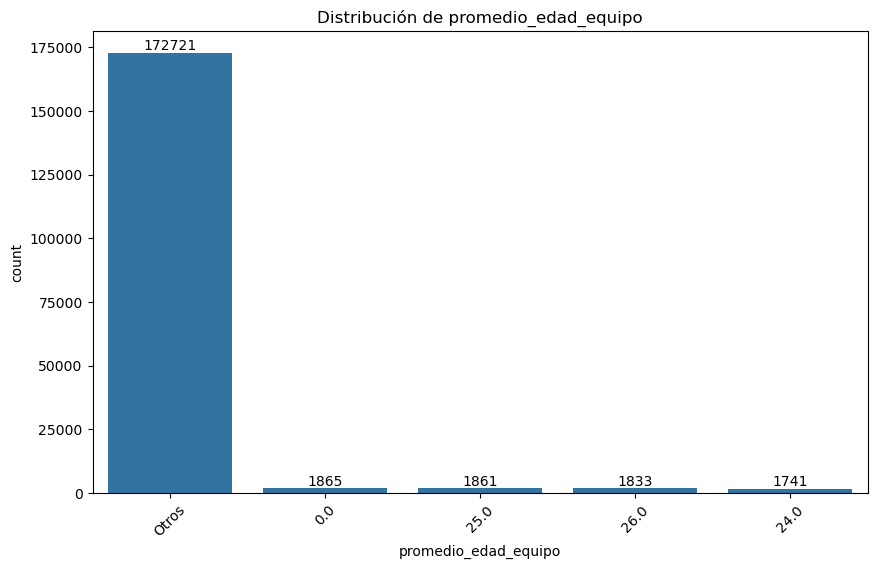

In [77]:
# Bucle para crear gráficos de cada columna
for columna in columnas:
    # Obtener los valores únicos y sus frecuencias
    conteo = datas[columna].value_counts()
    
    # Definir si la columna necesita agrupación o no
    if len(conteo) > 5:
        # Tomar el top 4 y agrupar el resto como "Otros"
        top_4 = conteo.nlargest(4)  # Obtener los 4 valores más frecuentes
        datas_grafico = datas[columna].apply(lambda x: x if x in top_4.index else "Otros")
        conteo_agrupado = datas_grafico.value_counts()
    else:
        # Si hay 5 o menos valores únicos, usar los valores tal cual
        conteo_agrupado = conteo
    
    # Graficar con Seaborn
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=datas_grafico if len(conteo) > 5 else datas[columna], 
                       order=conteo_agrupado.index)
    
    # Añadir los valores exactos arriba de cada barra
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), textcoords='offset points')
    
    # Título del gráfico
    plt.title(f"Distribución de {columna}")
    plt.xticks(rotation=45)
    plt.show()

# Observaciones explotarias:

1. posiciones: Mayoría jugadores polivalentes. Mas centales unicos que porteros
2. nacionalidad: Mayoria de los jugadores son Ingleses 
3. pierna: Mayoria derechos
5. nombre_liga_y: La mayoria de los clubes juegan en la premier league
6. nombre_liga: Misma tendencia nacionalidad (Ingleses)
7. est_general: La mas común es 64 con 11.002 jugadores, el valor mas alto de 94 con 6 jugadores. MUCHA diferencia
8. valor_de_mercado: valor mas común es 1.1M, el mayor valor es 194M es Mbappe
9. edad: La mayoria tiene 22
10. ritmo: Mas común 67 con 6.8K, mayor ritmo es 97, solo por 4 jugadores
11. chut: Mas común 60 con 4.9K, mayor ritmo es 94, solo por  Ronaldo Dos Santos Aveiro
12. pase:Mas común 59 con 6.5K, mayor ritmo es 94, solo por Kevin De Bruyne
13. regate: Mas común 65
14. defensa_x: Mas comun 63
15. fisico: Mas comun 71 
-. altura: Mas comun 1.80m, el mas alto es Kristof Van Hout con 2.08m
-. promedio_edad_titulares: Más común 25.09, si, con .09 por el promedio no?
-. promedio_edad_equipo: Más común 0.0 con 1.8K, idk

In [79]:
# Contar las ocurrencias por nacionalidad
conteo_est_general = data["nombre_liga"].value_counts()

# Ordenar de mayor a menor
conteo_est_general = conteo_est_general.sort_values(ascending=False)

# Mostrar el resultado
print(conteo_est_general)


nombre_liga
Premier League         9371
Serie A                8406
Bundesliga             8279
Liga Profesional       7505
Super League           7268
Championship           7138
Major League Soccer    6647
League One             6429
League Two             6371
La Liga 2              6303
Ligue 2                6024
La Liga                5946
Serie B                5375
Super Lig              5187
Ligue 1                5088
Primera Division       5066
Liga Portugal          5061
Eredivisie             4823
Pro League             4571
2. Bundesliga          4480
Jupiler Pro League     4460
Ekstraklasa            4394
3. Liga                4347
Liga MX                4076
Allsvenskan            4035
Liga BetPlay           4004
Eliteserien            3975
K League 1             3354
Superliga              3257
Premiership            3226
J-League               3188
Premier Division       2657
A-League               2463
Liga 1                 2107
Otros                  1865
Liga Pro

In [80]:
conteo_ritmo = data["ritmo"].value_counts()
conteo_ritmo = conteo_ritmo.sort_index(ascending=False)
print(conteo_ritmo)

ritmo
97      4
96     20
95     34
94    107
93    294
     ... 
17    228
16    120
15     37
14     10
13      2
Name: count, Length: 85, dtype: int64


In [81]:
# Agrupar por "est_general" y obtener la lista de jugadores en cada grupo
conteo_altura = data.groupby("altura")["nombre_jugador"].apply(list)

# Ordenar los resultados por "est_general" en orden descendente
conteo_altura = conteo_altura.sort_index(ascending=False)
print(conteo_altura)

altura
208                                   [Kristof Van Hout]
207                                   [Kristof Van Hout]
206    [Tomas Holy, Tomas Holy, Tomas Holy, Kyle Hudl...
205    [Tomas Holy, Tomas Holy, Dino Hodzic, Tomas Ho...
204    [Tor Hogne Aaroy, Jason Mooney, Jason Mooney, ...
203    [Costel Pantilimon, Lacina Traore, Aaron Chapm...
202    [Bogdan Milic, Karl Westdahl, Vanja Milinkovic...
201    [Peter Crouch, Fraser Forster, Simon Makienok,...
200    [Rob Jones, Alexander Pollhuber, Asmir Begovic...
199    [Andreas Isaksson, Brede Hangeland, Benedikt P...
198    [Mattias Asper, Per Mertesacker, Peter Kovacs,...
197    [Maarten Stekelenburg, Cesar Gonzalez Navas, A...
196    [Rio Ferdinand, Gabor Babos, Jamie Mccombe, Pe...
195    [Zlatan Ibrahimovic, Frode Kippe, Gareth Mcaul...
194    [Mark Schwarzer, Diederik Boer, David Meul, Ja...
193    [Jamie Langfield, Clive Platt, Paul Robinson, ...
192    [Luca Castellazzi, Sylvain Distin, Andre Muri,...
191    [Gabor Kiraly, Gi

#Auxilio:

nacimiento vs edad
promedio_edad_titulares: Más común 25.09, si, con .09 por el promedio no?
promedio_edad_equipo: Más común 0.0 con 1.8K, idk

Repetidos:
Mbappe repetido valor_de_mercado
Ronaldo Dos Santos Aveiro repetido chut
pase
regate
defensa_x
fisico
etc



In [84]:
# Agrupar por "est_general" y obtener la lista de jugadores en cada grupo
conteo_est_general = data.groupby("valor_de_mercado")["nombre_jugador"].apply(list)

# Ordenar los resultados por "est_general" en orden descendente
conteo_est_general = conteo_est_general.sort_index(ascending=False)
print(conteo_est_general)

valor_de_mercado
194000000                                      [Kylian Mbappe]
190500000                                      [Kylian Mbappe]
185500000                                      [Kylian Mbappe]
185000000                                     [Erling Haaland]
181500000                                      [Kylian Mbappe]
                                   ...                        
5000         [Andy Hughes, Shaun Derry, Shalrie Joseph, Jai...
3000         [Brian Barry Murphy, Patrick Jennings, Abdo Al...
2000         [Matt Oakley, Gaetano Vastola, Marek Sokolowsk...
1000         [Cedric Barbosa, Daniel Berg Hestad, Anders Sv...
0            [Ricardo Alberto Silv De Carvalho, Ian Harte, ...
Name: nombre_jugador, Length: 342, dtype: object


In [85]:
# Filtrar el DataFrame para incluir solo a "Kylian Mbappe"
data_mbappe = data[data["nombre_jugador"] == "Kylian Mbappe"]

# Agrupar por "est_general" y obtener la lista de jugadores en cada grupo
conteo_est_general = data_mbappe.groupby("est_general")["nombre_jugador"].apply(list)

# Ordenar los resultados por "est_general" en orden descendente
conteo_est_general = conteo_est_general.sort_index(ascending=False)
print(conteo_est_general)

est_general
91    [Kylian Mbappe, Kylian Mbappe, Kylian Mbappe]
90                                  [Kylian Mbappe]
89                                  [Kylian Mbappe]
87                                  [Kylian Mbappe]
83                                  [Kylian Mbappe]
Name: nombre_jugador, dtype: object


In [86]:
conteo_chut = data.groupby("chut")["nombre_jugador"].apply(list)
conteo_chut = conteo_chut.sort_index(ascending=False)
print(conteo_chut)

chut
94                        [C Ronaldo Dos Santos Aveiro]
93    [C Ronaldo Dos Santos Aveiro, C Ronaldo Dos Sa...
92    [C Ronaldo Dos Santos Aveiro, Lionel Messi, Li...
91    [Zlatan Ibrahimovic, Lionel Messi, Harry Kane,...
90    [Robin Van Persie, Zlatan Ibrahimovic, Zlatan ...
                            ...                        
18    [Domenico Maietta, Luca Pagliarulo, Tim Clancy...
17    [Nedeljko Malic, Brian Easton, Thomas Reifelts...
16    [Niall Canavan, Joe Shaughnessy, Marco Chiosa,...
15    [Matteo Bruscagin, Federico Ceccherini, Fabriz...
14    [Tam Scobbie, Tam Scobbie, Jherson Vergara, Jh...
Name: nombre_jugador, Length: 81, dtype: object


In [87]:
conteo_pase = data.groupby("pase")["nombre_jugador"].apply(list)
conteo_pase = conteo_pase.sort_index(ascending=False)
print(conteo_pase)

pase
94                                    [Kevin De Bruyne]
93    [Andrea Pirlo, Kevin De Bruyne, Kevin De Bruyn...
92     [Kevin De Bruyne, Lionel Messi, Kevin De Bruyne]
91    [Andrea Pirlo, Xavier Hernandez Creus, Andrea ...
90    [Francesc Fabregas I Soler, Luka Modric, Toni ...
                            ...                        
25    [Maximilian Karner, Jack Cowgill, Eissa Al Abb...
24    [Ben Warland, Marcel Lenz, George Ray, Kevin P...
23                           [Chong Zhang, Chong Zhang]
22                  [Maximilian Karner, Sam Ramsbottom]
20                                    [Edoardo Lancini]
Name: nombre_jugador, Length: 74, dtype: object


In [88]:
# Agrupar por "est_general" y obtener la lista de jugadores en cada grupo
conteo_fisico = data.groupby("fisico")["nombre_jugador"].apply(list)

# Ordenar los resultados por "est_general" en orden descendente
conteo_fisico = conteo_fisico.sort_index(ascending=False)
print(conteo_fisico)

fisico
92                                    [Jelle Van Damme]
91    [Jelle Van Damme, Victor Wanyama, Carlos Henri...
90    [Yaya Toure, Marouane Fellaini, Callum Paterso...
89    [George Elokobi, Jelle Van Damme, Marouane Fel...
88    [John Obi Mikel, Cheick Tiote, Jean Sylvain Ba...
                            ...                        
21    [Quentin Braat, Kazushige Kirihata, Daniel Rod...
20    [Michael Verrips, Tom Heward Belle, Baboucarr ...
19    [Jakub Osobinski, Jakub Osobinski, Elliot Pani...
18    [Marcel Zapytowski, Michael Luyambula, Luis Za...
17                       [Ben Voll, Ben Voll, Ben Voll]
Name: nombre_jugador, Length: 76, dtype: object
